In [1]:
import pandas as pd
import numpy as np

In [2]:
import os    
from chardet import detect

Import potrzebnych bibliotek, bazy i sprawdzenie rodzaju kodowania

In [3]:
def get_encoding_type(file):
    with open(file, 'rb') as f:
        rawdata = f.read()
    return detect(rawdata)['encoding']

In [4]:
file_type = get_encoding_type('dataset.csv')

In [5]:
print(file_type)

Windows-1252


In [6]:
df = pd.read_csv('dane_rekrutacja.csv', encoding = file_type, sep = ';', engine='python')
df.to_csv('df_output.csv', encoding='utf-8')
df = pd.read_csv('df_output.csv').iloc[:, 1:]

In [7]:
df.head()

,id,nazwa_wojewodztwa,kod_rynku,kod_branzy,liczba_pracownikow,zrodlo_rejestr,data_rejestracji,data_ostatnie_zamowienie,obecnosc_w_internecie,jakosc_strony_www,allegro,srednia_liczba_odslon,hurt,target_wartosc_sprzedazy
0,12259,œl¹skie,TYW,10001,21-50 osób,KRS,2002-01-01,2020-06-30,e-commerce,98.0,TAK,8 278,1,165550
1,56795,ma³opolskie,NSW,98,6-10 osób,KRS,2004-06-30,2020-08-28,ma stronê www,100.0,NIE,5 938,0,118759
2,12570,wielkopolskie,POW,10001,101-250 osób,KRS,2003-10-17,2020-10-08,ma stronê www,79.0,NIE,11 542,1,115420
3,13285,œl¹skie,TYW,755,2-5 osób,CEIDG,1994-02-25,2020-07-31,ma stronê www,70.0,TAK,5 400,0,108000
4,52504,zachodniopomorskie,SZW,755,6-10 osób,KRS,2015-08-31,2020-03-05,ma stronê www,79.0,NIE,5 206,0,104111


Wstępna analiza, przegląd i czyszczenie danych

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df

,id,nazwa_wojewodztwa,kod_rynku,kod_branzy,liczba_pracownikow,zrodlo_rejestr,data_rejestracji,data_ostatnie_zamowienie,obecnosc_w_internecie,jakosc_strony_www,allegro,srednia_liczba_odslon,hurt,target_wartosc_sprzedazy
0,12259,œl¹skie,TYW,10001,21-50 osób,KRS,2002-01-01,2020-06-30,e-commerce,98.0,TAK,8 278,1,165550
1,56795,ma³opolskie,NSW,98,6-10 osób,KRS,2004-06-30,2020-08-28,ma stronê www,100.0,NIE,5 938,0,118759
2,12570,wielkopolskie,POW,10001,101-250 osób,KRS,2003-10-17,2020-10-08,ma stronê www,79.0,NIE,11 542,1,115420
3,13285,œl¹skie,TYW,755,2-5 osób,CEIDG,1994-02-25,2020-07-31,ma stronê www,70.0,TAK,5 400,0,108000
4,52504,zachodniopomorskie,SZW,755,6-10 osób,KRS,2015-08-31,2020-03-05,ma stronê www,79.0,NIE,5 206,0,104111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12240,35712,mazowieckie,WAW,652,1 osoba,CEIDG,2011-10-06,2020-09-25,ma stronê www,70.0,NIE,20,0,400
12241,42984,³ódzkie,SRW,1574,2-5 osób,CEIDG,2011-07-19,2019-06-07,nie ma strony www,NaN,NIE,NaN,0,400
12242,48918,kujawsko-pomorskie,BDW,10001,NaN,CEIDG,2008-02-01,2020-06-30,ma stronê www,58.0,NIE,20,0,400
12243,62488,wielkopolskie,KNW,1574,1 osoba,CEIDG,2008-06-01,2018-04-04,ma stronê www,49.0,NIE,8,0,400


In [10]:
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

Wykres pokazuje wartości NaN w tabeli

<AxesSubplot: >

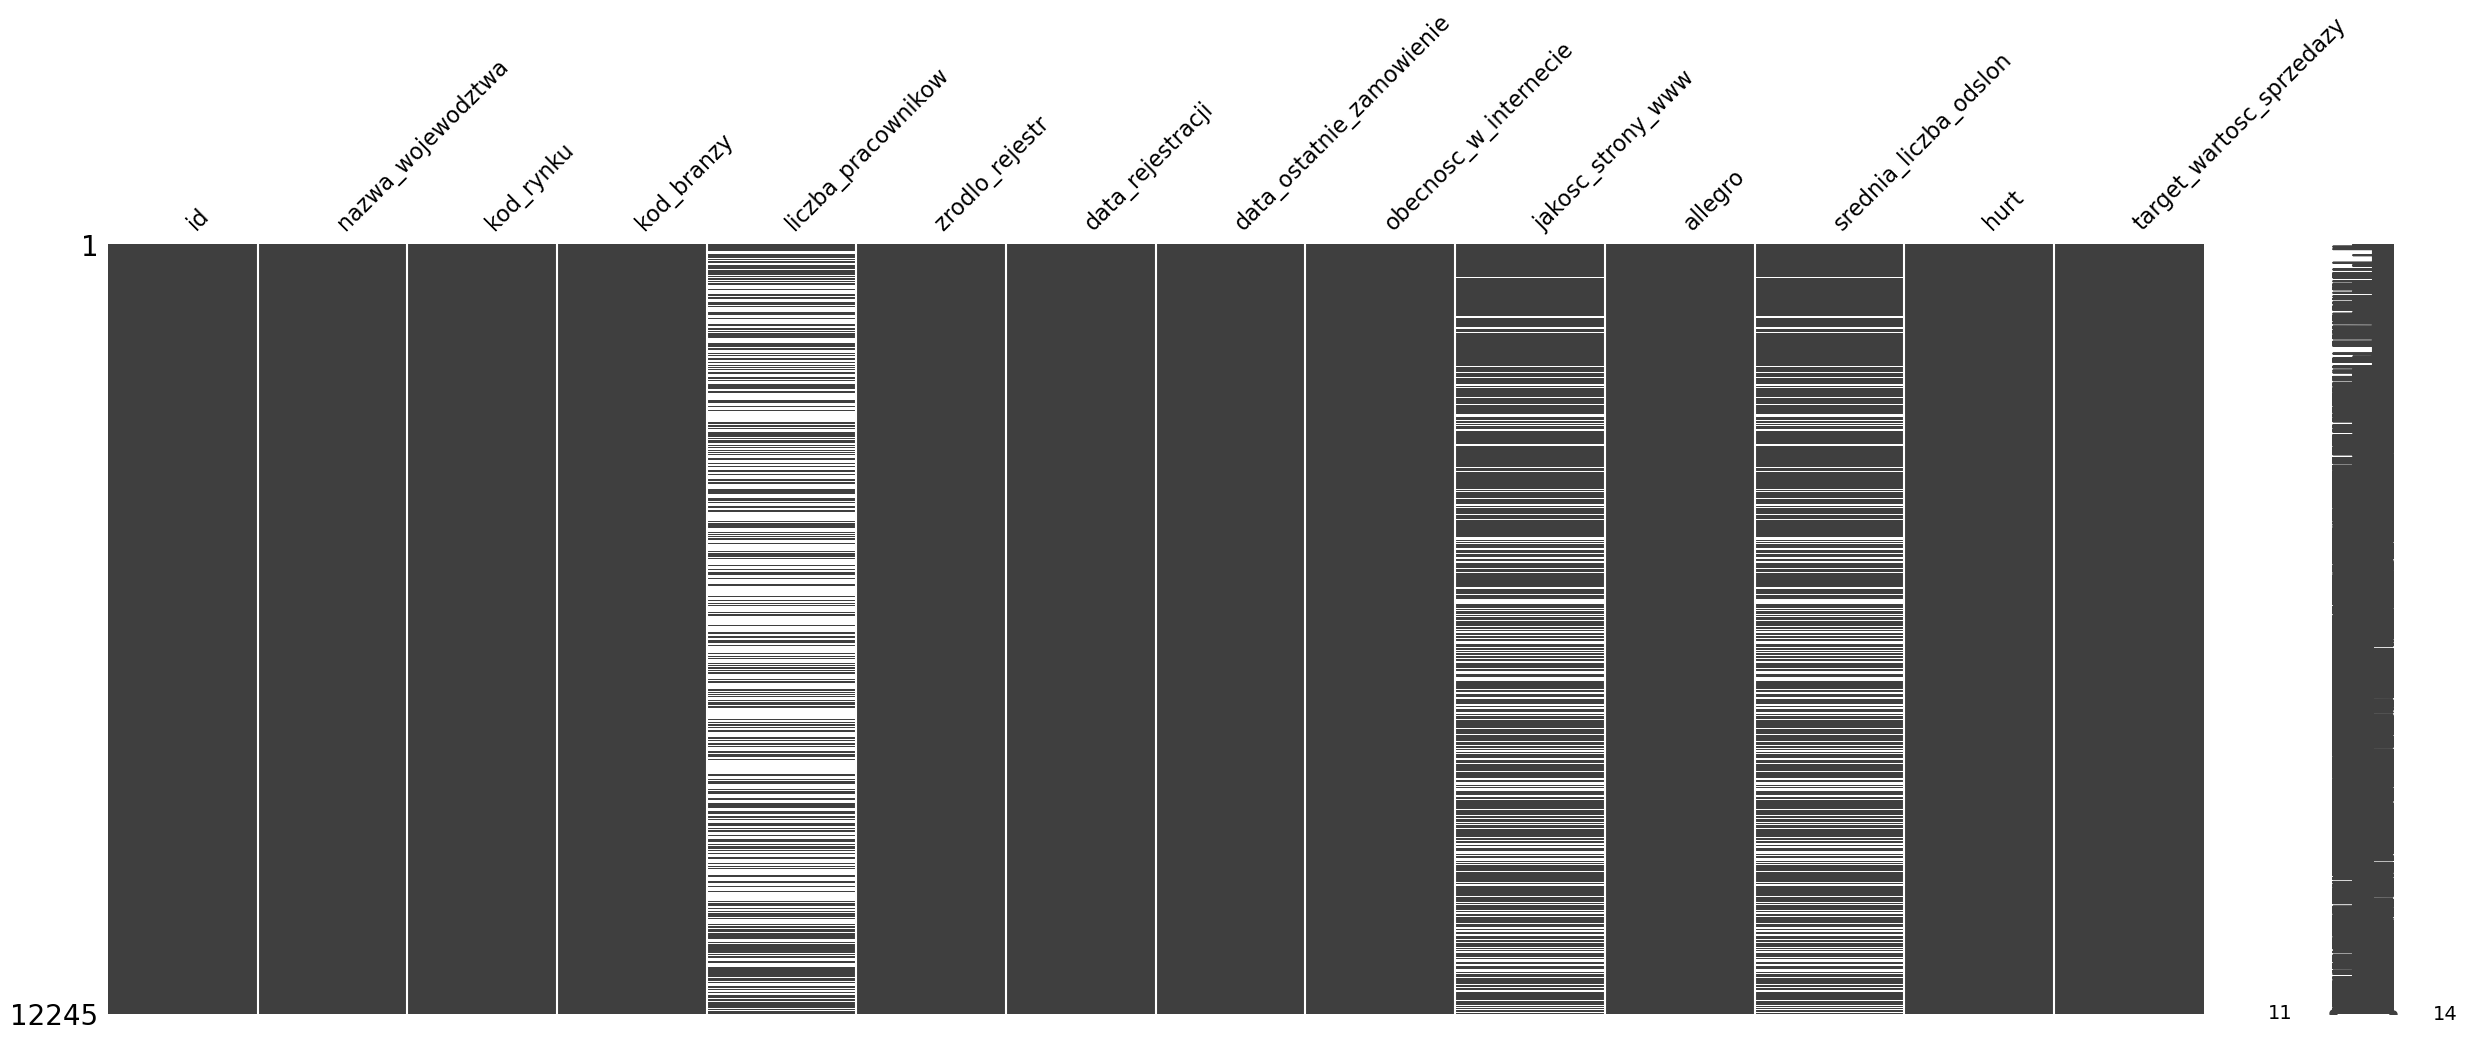

In [11]:
missingno.matrix(df, figsize = (30,10))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12245 entries, 0 to 12244
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        12245 non-null  int64  
 1   nazwa_wojewodztwa         12245 non-null  object 
 2   kod_rynku                 12245 non-null  object 
 3   kod_branzy                12245 non-null  int64  
 4   liczba_pracownikow        5123 non-null   object 
 5   zrodlo_rejestr            12245 non-null  object 
 6   data_rejestracji          12245 non-null  object 
 7   data_ostatnie_zamowienie  12245 non-null  object 
 8   obecnosc_w_internecie     12245 non-null  object 
 9   jakosc_strony_www         9344 non-null   float64
 10  allegro                   12245 non-null  object 
 11  srednia_liczba_odslon     9344 non-null   object 
 12  hurt                      12245 non-null  int64  
 13  target_wartosc_sprzedazy  12245 non-null  object 
dtypes: flo

In [13]:
df.describe()

,id,kod_branzy,jakosc_strony_www,hurt
count,12245.000000,12245.000000,9344.000000,12245.000000
mean,44686.483708,1335.399918,57.320741,0.199347
std,23059.203983,2208.199402,14.078706,0.399525
min,2.000000,5.000000,35.000000,0.000000
25%,25749.000000,437.000000,46.000000,0.000000
50%,46330.000000,848.000000,56.000000,0.000000
75%,64168.000000,1387.000000,66.000000,0.000000
max,83570.000000,10001.000000,100.000000,1.000000


In [14]:
columns = list(df.columns)

In [15]:
df[columns[1]].unique()

array(['œl¹skie', 'ma³opolskie', 'wielkopolskie', 'zachodniopomorskie',
       'mazowieckie', 'dolnoœl¹skie', 'lubelskie', 'œwiêtokrzyskie',
       'pomorskie', '³ódzkie', 'lubuskie', 'kujawsko-pomorskie',
       'podlaskie', 'warmiñsko-mazurskie', 'opolskie', 'podkarpackie'],
      dtype=object)

Zmiana nazw województw na poprawne

In [16]:
voivodeship_name = ['slaskie', 'malopolskie', 'wielkopolskie', 'zachodniopomorskie',
       'mazowieckie', 'dolnoslaskie', 'lubelskie', 'swietokrzyskie',
                   'pomorskie', 'lodzkie', 'lubuskie', 'kujawsko-pomorskie',
       'podlaskie', 'warminsko-mazurskie', 'opolskie', 'podkarpackie']

In [17]:
df[columns[1]].replace(df[columns[1]].unique(), voivodeship_name, inplace = True)

In [18]:
df[columns[1]].unique()

array(['slaskie', 'malopolskie', 'wielkopolskie', 'zachodniopomorskie',
       'mazowieckie', 'dolnoslaskie', 'lubelskie', 'swietokrzyskie',
       'pomorskie', 'lodzkie', 'lubuskie', 'kujawsko-pomorskie',
       'podlaskie', 'warminsko-mazurskie', 'opolskie', 'podkarpackie'],
      dtype=object)

In [19]:
df[columns[1]].info()

<class 'pandas.core.series.Series'>
Int64Index: 12245 entries, 0 to 12244
Series name: nazwa_wojewodztwa
Non-Null Count  Dtype 
--------------  ----- 
12245 non-null  object
dtypes: object(1)
memory usage: 191.3+ KB


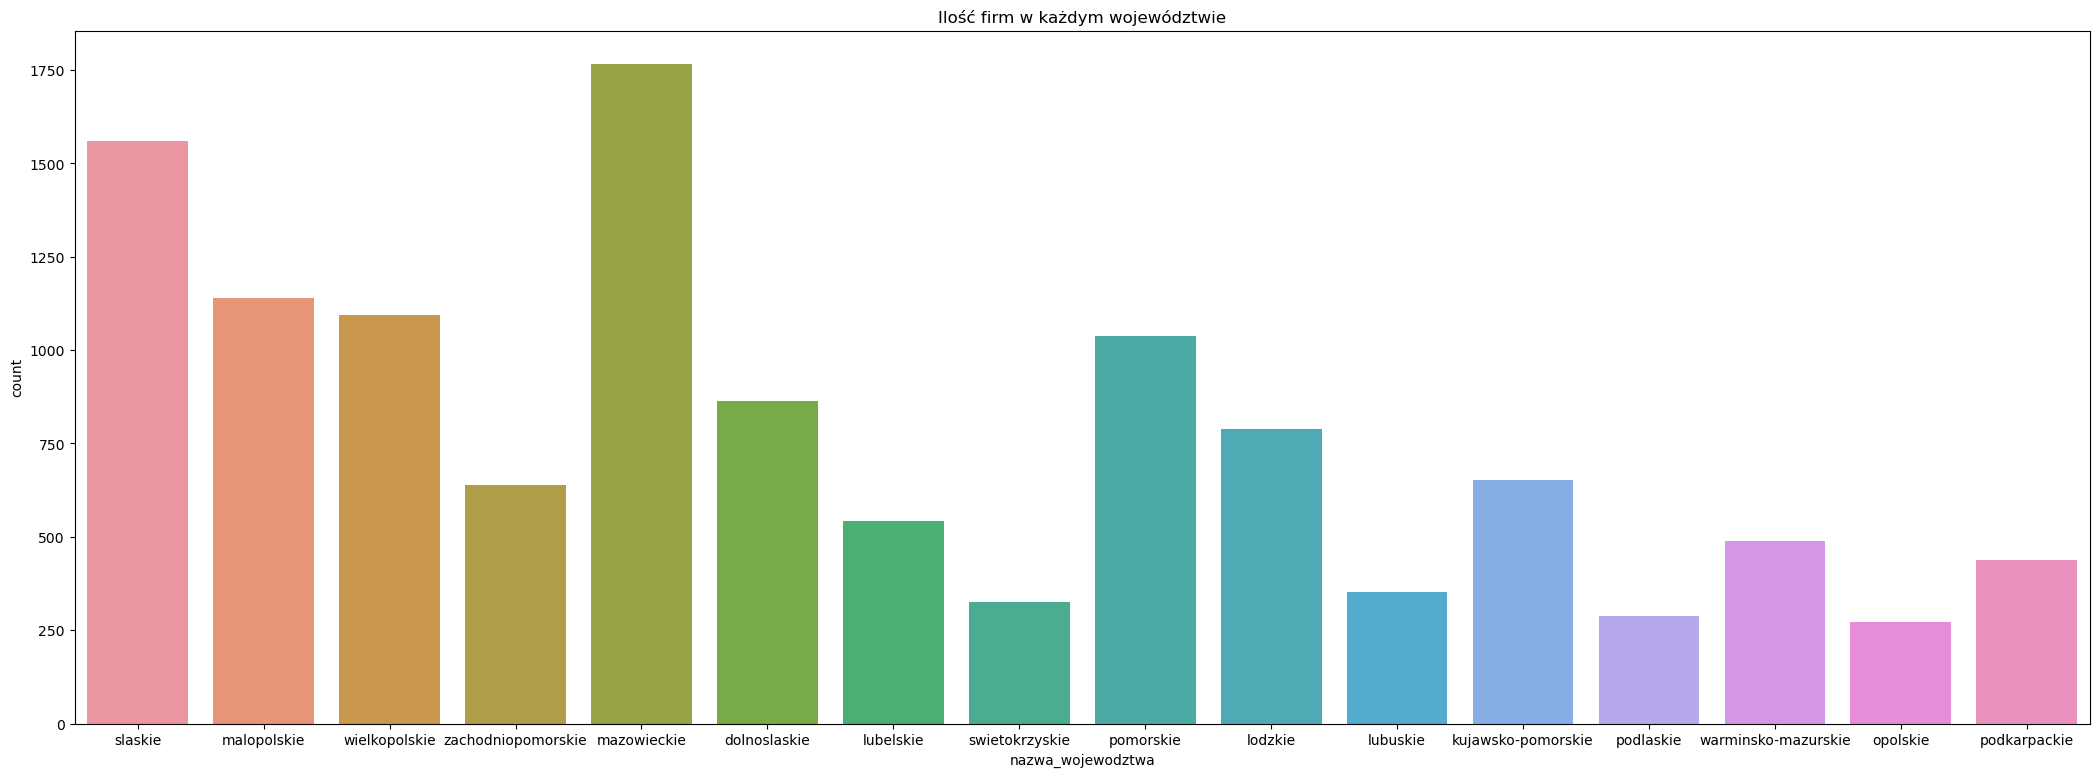

In [20]:
f, ax = plt.subplots(figsize=(26, 9))
sns.countplot(x = columns[1], data = df)
plt.title('Ilość firm w każdym województwie')
plt.show()

In [21]:
df[columns[2]].unique()

array(['TYW', 'NSW', 'POW', 'SZW', 'WAW', 'KTW', 'TRW', 'WRW', 'LBW',
       'KIW', 'WBW', 'BBW', 'RBW', 'GRW', 'KRW', 'GDW', 'DGW', 'PTW',
       'GWW', 'GLW', 'BDW', 'JGW', 'BIW', 'LDW', 'KSW', 'OLW', 'PAW',
       'TOW', 'PIW', 'ZMW', 'LGW', 'RDW', 'GAW', 'ZGW', 'OPW', 'SLW',
       'LNW', 'CZW', 'LMW', 'SUW', 'RZW', 'LSW', 'KNW', 'KLW', 'SKW',
       'PLW', 'BPW', 'TBW', 'WLW', 'SDW', 'SRW', 'ELW', 'KOW', 'PRW',
       'OSW', 'MZW', 'CHW'], dtype=object)

In [22]:
df[columns[2]].info()

<class 'pandas.core.series.Series'>
Int64Index: 12245 entries, 0 to 12244
Series name: kod_rynku
Non-Null Count  Dtype 
--------------  ----- 
12245 non-null  object
dtypes: object(1)
memory usage: 191.3+ KB


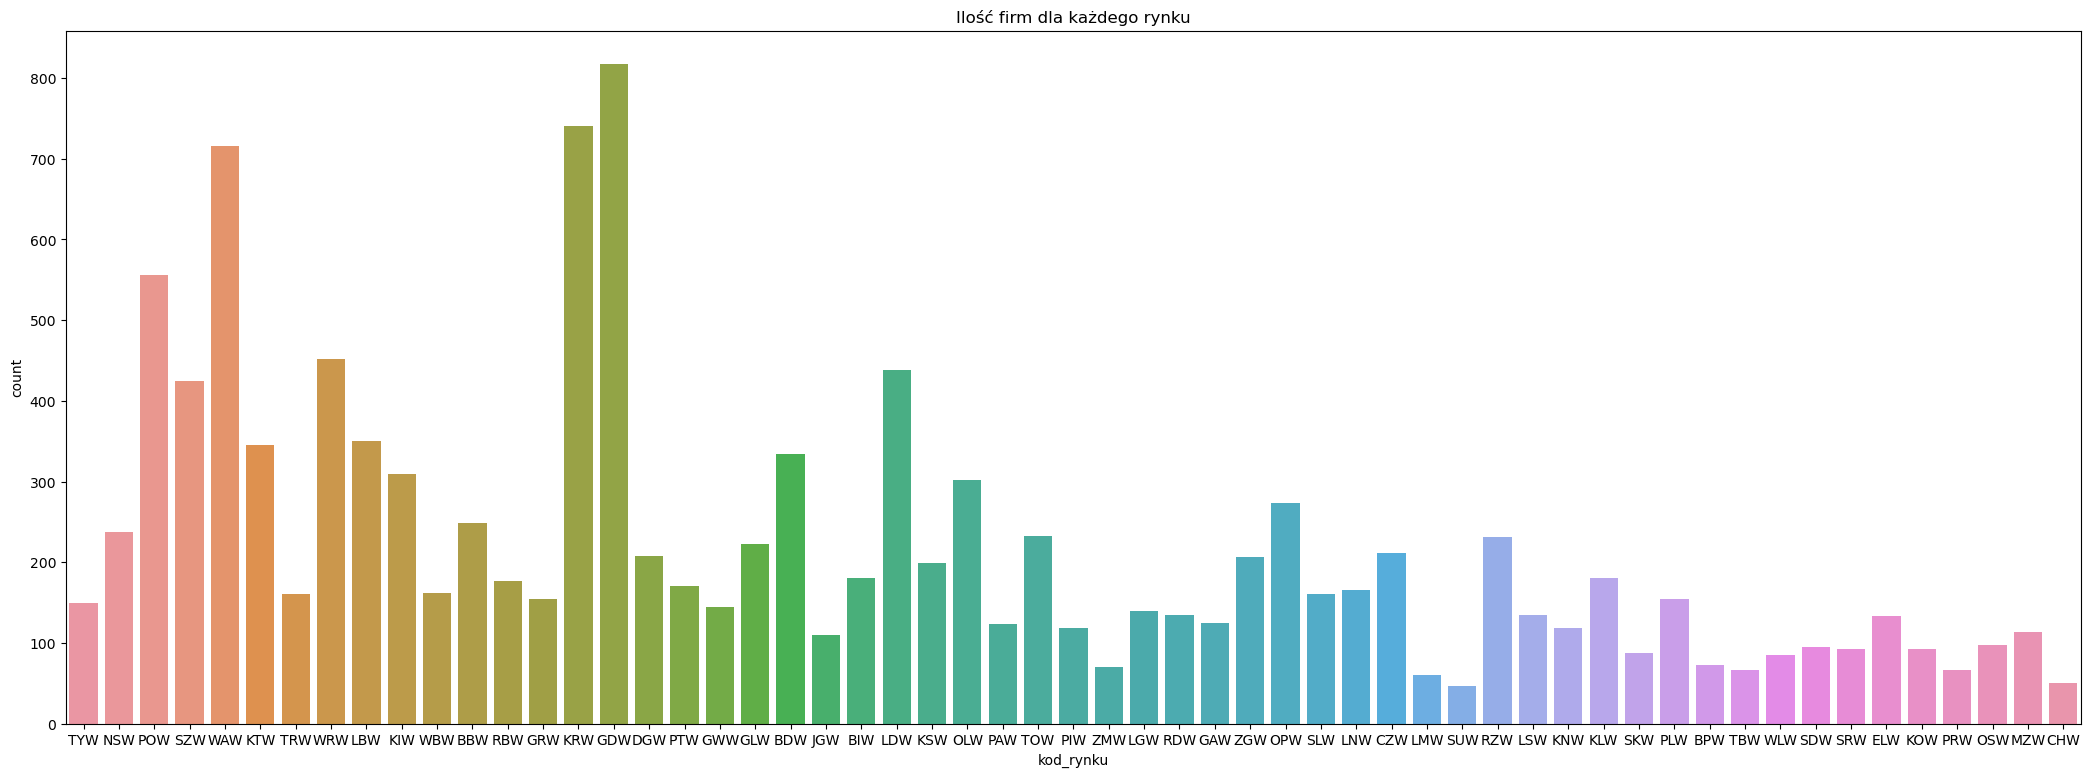

In [23]:
f, ax = plt.subplots(figsize=(26, 9))
sns.countplot(x = columns[2], data = df)
plt.title('Ilość firm dla każdego rynku')
plt.show()

In [24]:
df[columns[3]].unique()

array([10001,    98,   755,   907,  1387,  1433,   526,  1386,   848,
        1574,   522,   411,  1171,   652,     5,   437,   968,  1402],
      dtype=int64)

In [25]:
df[columns[3]].info()

<class 'pandas.core.series.Series'>
Int64Index: 12245 entries, 0 to 12244
Series name: kod_branzy
Non-Null Count  Dtype
--------------  -----
12245 non-null  int64
dtypes: int64(1)
memory usage: 191.3 KB


In [26]:
df[columns[3]] = df[columns[3]].astype(str)

In [27]:
df[columns[3]].info()

<class 'pandas.core.series.Series'>
Int64Index: 12245 entries, 0 to 12244
Series name: kod_branzy
Non-Null Count  Dtype 
--------------  ----- 
12245 non-null  object
dtypes: object(1)
memory usage: 191.3+ KB


Zmiana typu kolumny z numerycznej na kategoryczną, dla lepszej interpretacji przez model

In [28]:
df[columns[3]].unique()

array(['10001', '98', '755', '907', '1387', '1433', '526', '1386', '848',
       '1574', '522', '411', '1171', '652', '5', '437', '968', '1402'],
      dtype=object)

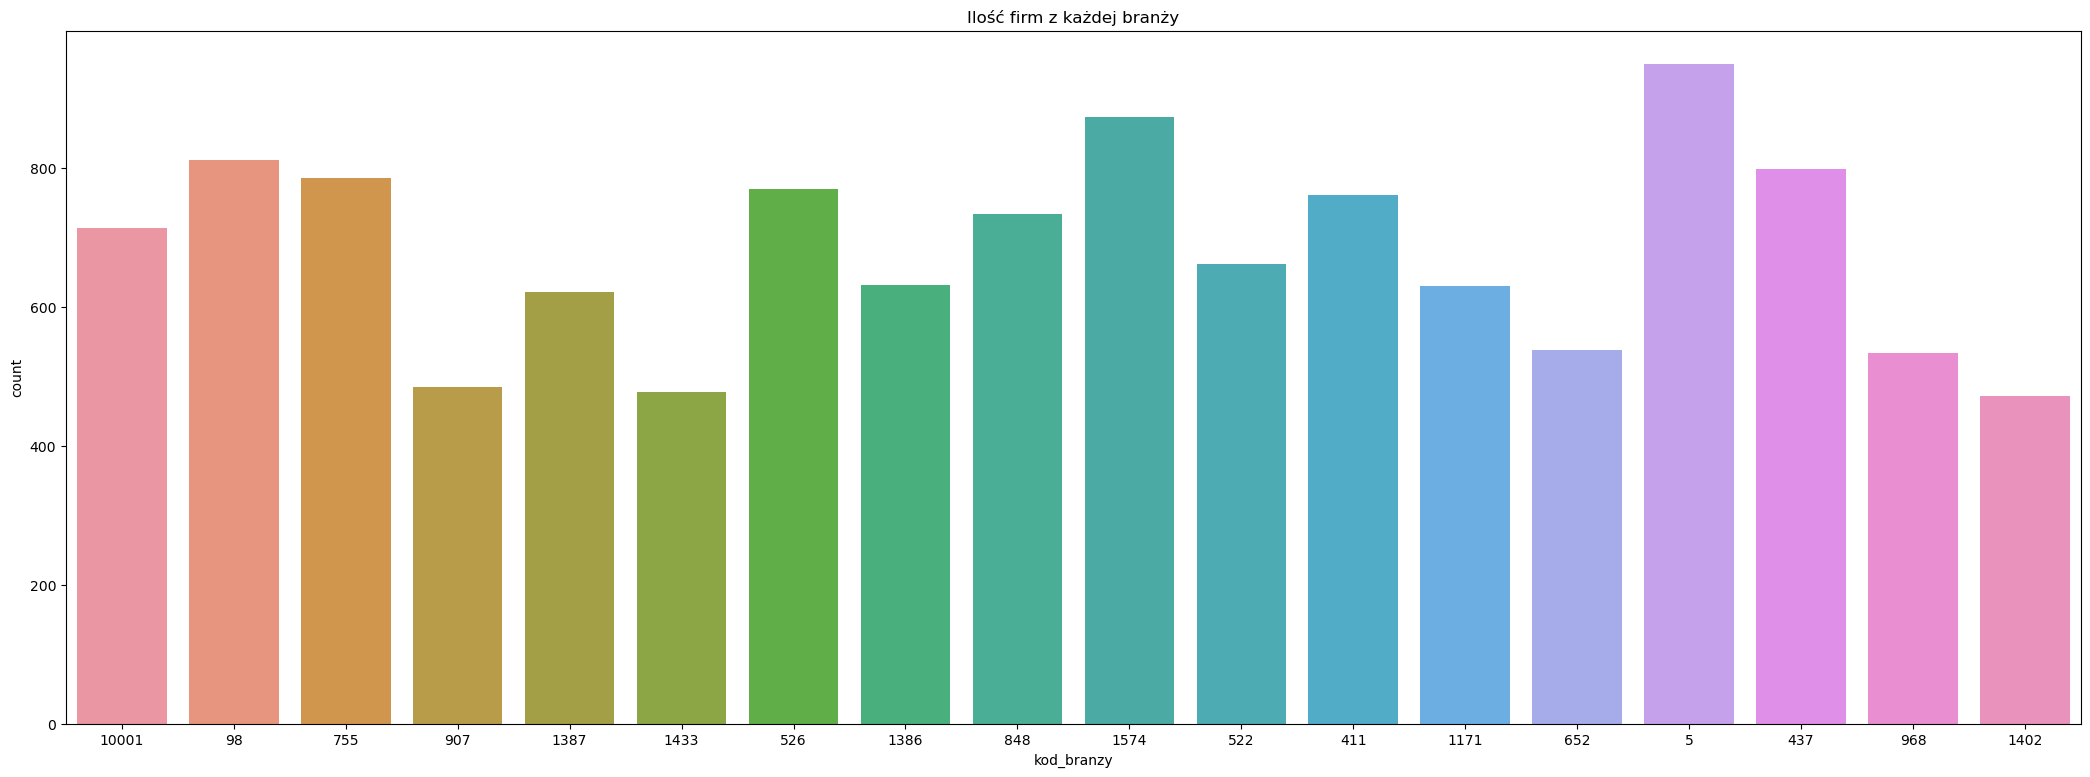

In [29]:
f, ax = plt.subplots(figsize=(26, 9))
sns.countplot(x = columns[3], data = df)
plt.title('Ilość firm z każdej branży')
plt.show()

In [30]:
df[columns[4]].unique()

array(['21-50 osób', '6-10 osób', '101-250 osób', '2-5 osób', '1 osoba',
       nan, '51-100 osób', '11-20 osób', 'powy¿ej 250 osób'], dtype=object)

In [31]:
df[columns[4]].info()

<class 'pandas.core.series.Series'>
Int64Index: 12245 entries, 0 to 12244
Series name: liczba_pracownikow
Non-Null Count  Dtype 
--------------  ----- 
5123 non-null   object
dtypes: object(1)
memory usage: 191.3+ KB


Zmiana nazw danych

In [32]:
employees_count = ['21-50', '6-10', '101-250', '2-5', '1', np.nan, '51-100', '11-20', '250<']
employees_order = ['1', '2-5', '6-10', '11-20', '21-50', '51-100', '101-250', '250<', np.nan]

In [33]:
df[columns[4]].replace(df[columns[4]].unique(), employees_count, inplace = True)

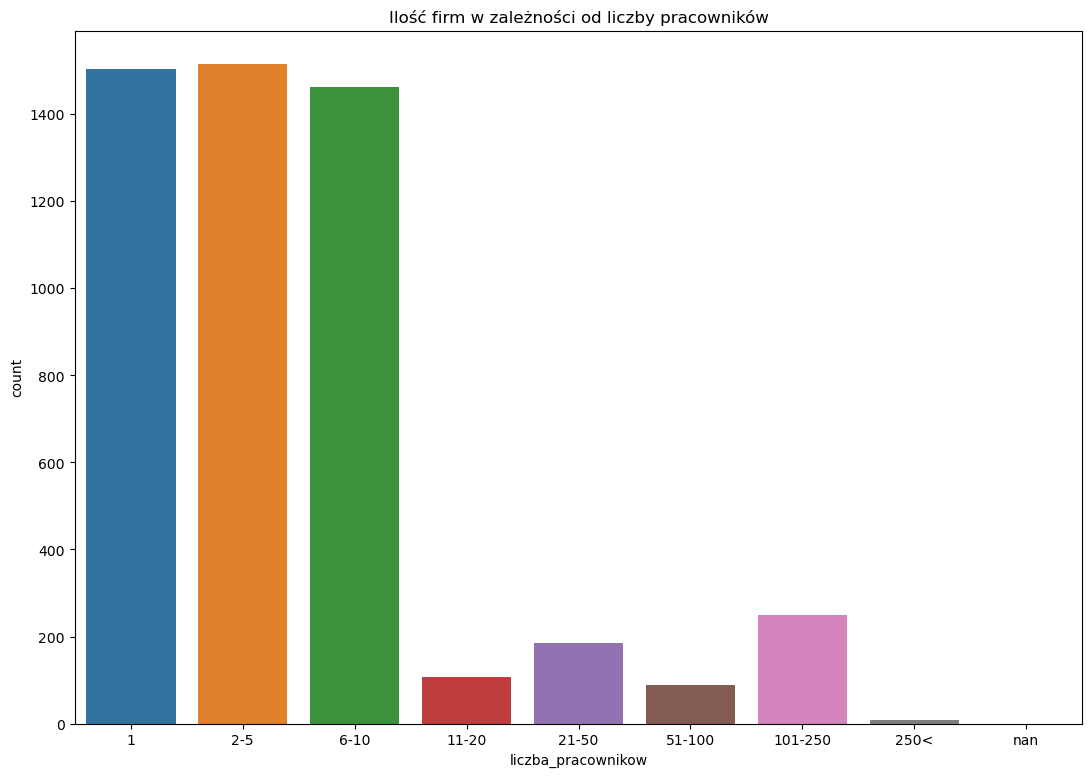

In [34]:
f, ax = plt.subplots(figsize=(13, 9))
sns.countplot(x = columns[4], data = df, order = employees_order)
plt.title('Ilość firm w zależności od liczby pracowników')
plt.show()

In [35]:
df[columns[4]].isnull().sum()

7122

In [36]:
print(f'{df[columns[4]].isnull().sum() / len(df)}% pustych kolumn')

0.581625153123724% pustych kolumn


Później usuniemy tę kolumnę, ponieważ jest za dużo brakujących danych

In [37]:
df[columns[5]].info()

<class 'pandas.core.series.Series'>
Int64Index: 12245 entries, 0 to 12244
Series name: zrodlo_rejestr
Non-Null Count  Dtype 
--------------  ----- 
12245 non-null  object
dtypes: object(1)
memory usage: 191.3+ KB


In [38]:
df[columns[5]].unique()

array(['KRS', 'CEIDG'], dtype=object)

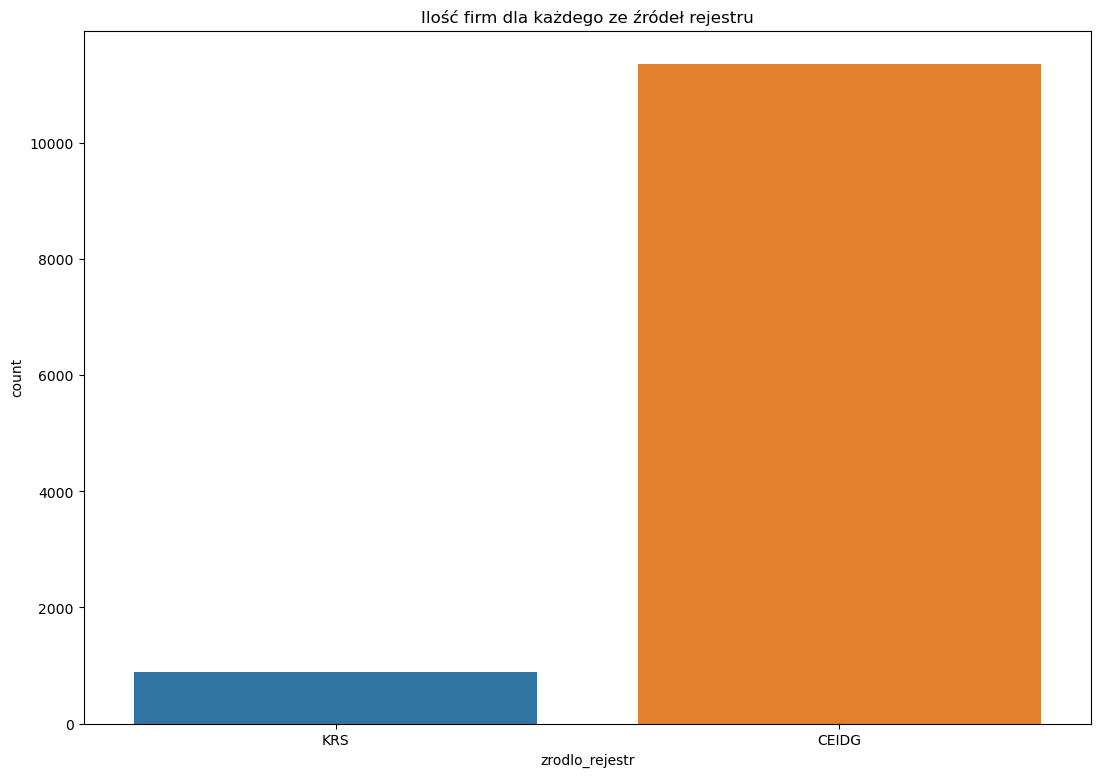

In [39]:
f, ax = plt.subplots(figsize=(13, 9))
sns.countplot(x = columns[5], data = df)
plt.title('Ilość firm dla każdego ze źródeł rejestru')
plt.show()

In [40]:
print(f'{len(df[df[columns[5]] == "CEIDG"]) / len(df)}% firm zarejestrowanych w CEIDG')

0.9281339322172315% firm zarejestrowanych w CEIDG


In [41]:
df[columns[6]].info()

<class 'pandas.core.series.Series'>
Int64Index: 12245 entries, 0 to 12244
Series name: data_rejestracji
Non-Null Count  Dtype 
--------------  ----- 
12245 non-null  object
dtypes: object(1)
memory usage: 191.3+ KB


Zmiana typu kolumny z object na datatime w celu lepszej analizy

In [42]:
df[columns[6]] = pd.to_datetime(df[columns[6]])

In [43]:
df.head()

,id,nazwa_wojewodztwa,kod_rynku,kod_branzy,liczba_pracownikow,zrodlo_rejestr,data_rejestracji,data_ostatnie_zamowienie,obecnosc_w_internecie,jakosc_strony_www,allegro,srednia_liczba_odslon,hurt,target_wartosc_sprzedazy
0,12259,slaskie,TYW,10001,21-50,KRS,2002-01-01,2020-06-30,e-commerce,98.0,TAK,8 278,1,165550
1,56795,malopolskie,NSW,98,6-10,KRS,2004-06-30,2020-08-28,ma stronê www,100.0,NIE,5 938,0,118759
2,12570,wielkopolskie,POW,10001,101-250,KRS,2003-10-17,2020-10-08,ma stronê www,79.0,NIE,11 542,1,115420
3,13285,slaskie,TYW,755,2-5,CEIDG,1994-02-25,2020-07-31,ma stronê www,70.0,TAK,5 400,0,108000
4,52504,zachodniopomorskie,SZW,755,6-10,KRS,2015-08-31,2020-03-05,ma stronê www,79.0,NIE,5 206,0,104111


In [44]:
df[columns[6]].describe()

C:\Users\otbgo\AppData\Local\Temp\ipykernel_15420\3084434551.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[columns[6]].describe()


count                   12245
unique                   4822
top       1992-12-01 00:00:00
freq                       97
first     1909-01-01 00:00:00
last      2020-10-22 00:00:00
Name: data_rejestracji, dtype: object

Tworzymy nową tymczasową tabelę zawierającą datę rejestru oraz target sprzedaży w celu łatwiejszej wizualizacji oraz analizy

In [45]:
df_date = df[[columns[6], columns[-1]]]

In [46]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12245 entries, 0 to 12244
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   data_rejestracji          12245 non-null  datetime64[ns]
 1   target_wartosc_sprzedazy  12245 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 287.0+ KB


Zmiana typu kolumny 'target_wartosc_sprzedazy' na float

In [47]:
df[columns[13]] = df[columns[13]].astype(str).str.replace(',', '.')
df[columns[13]] = df[columns[13]].astype(float)

In [48]:
df_date = df[[columns[6], columns[-1]]]

In [49]:
df_date.head()

,data_rejestracji,target_wartosc_sprzedazy
0,2002-01-01,165550.0
1,2004-06-30,118759.0
2,2003-10-17,115420.0
3,1994-02-25,108000.0
4,2015-08-31,104111.0


In [50]:
df_date.index = df_date[columns[6]]

In [51]:
df_date.head()

,data_rejestracji,target_wartosc_sprzedazy
data_rejestracji,,
2002-01-01,2002-01-01,165550.0
2004-06-30,2004-06-30,118759.0
2003-10-17,2003-10-17,115420.0
1994-02-25,1994-02-25,108000.0
2015-08-31,2015-08-31,104111.0


In [52]:
df_date.drop(columns[6], axis = 1, inplace = True)

C:\Users\otbgo\AppData\Local\Temp\ipykernel_15420\1968210667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date.drop(columns[6], axis = 1, inplace = True)


In [53]:
df_date.head()

,target_wartosc_sprzedazy
data_rejestracji,
2002-01-01,165550.0
2004-06-30,118759.0
2003-10-17,115420.0
1994-02-25,108000.0
2015-08-31,104111.0


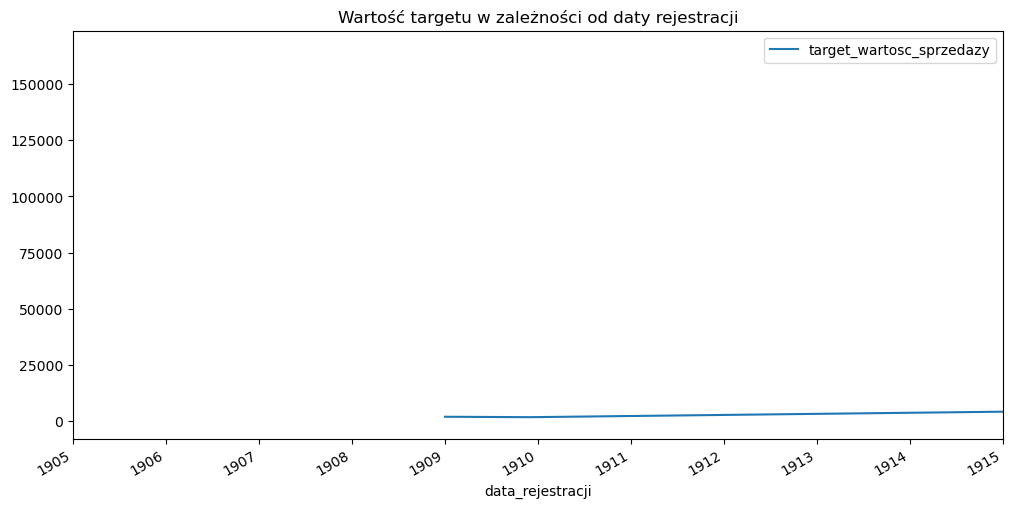

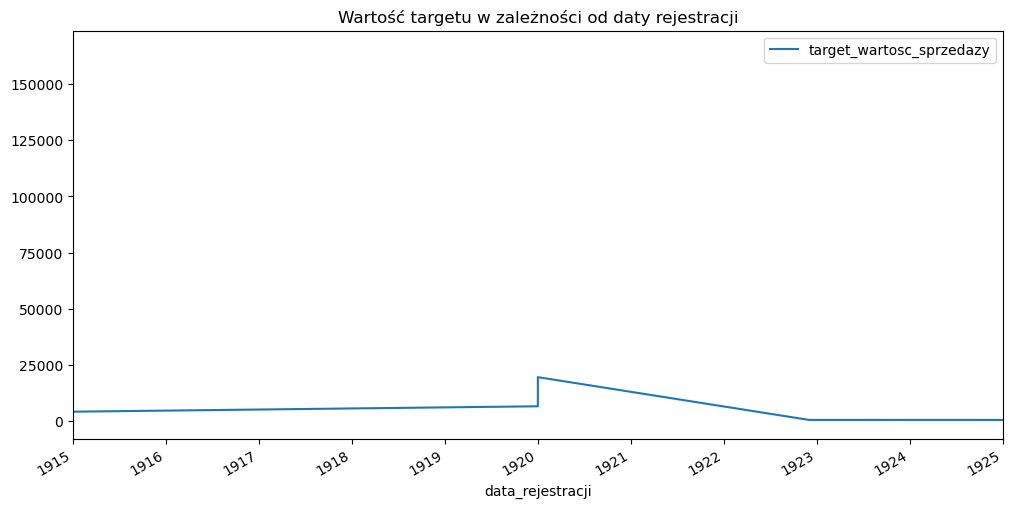

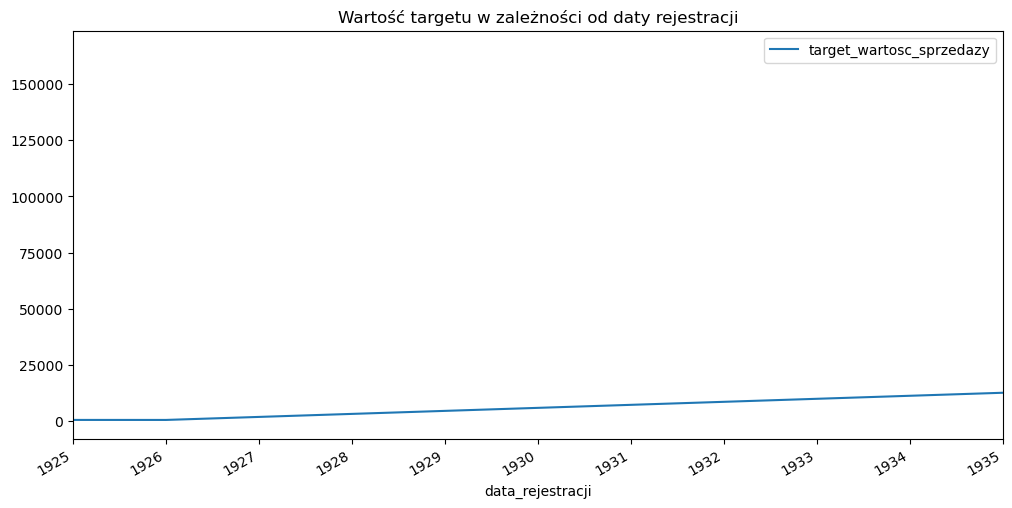

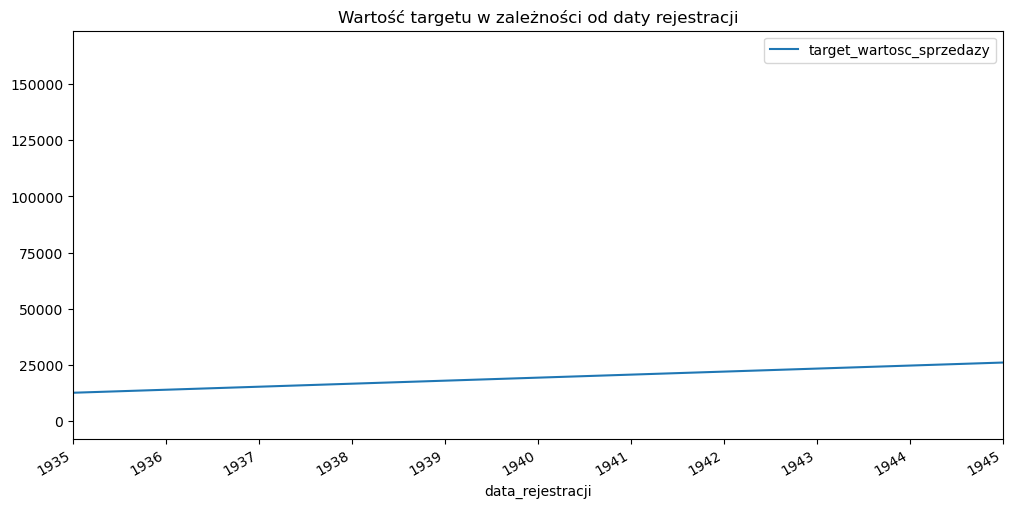

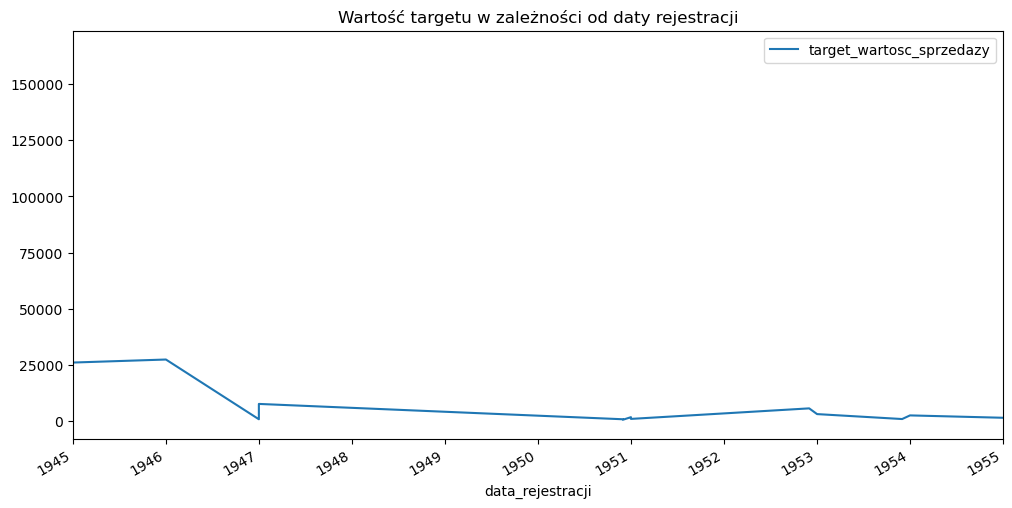

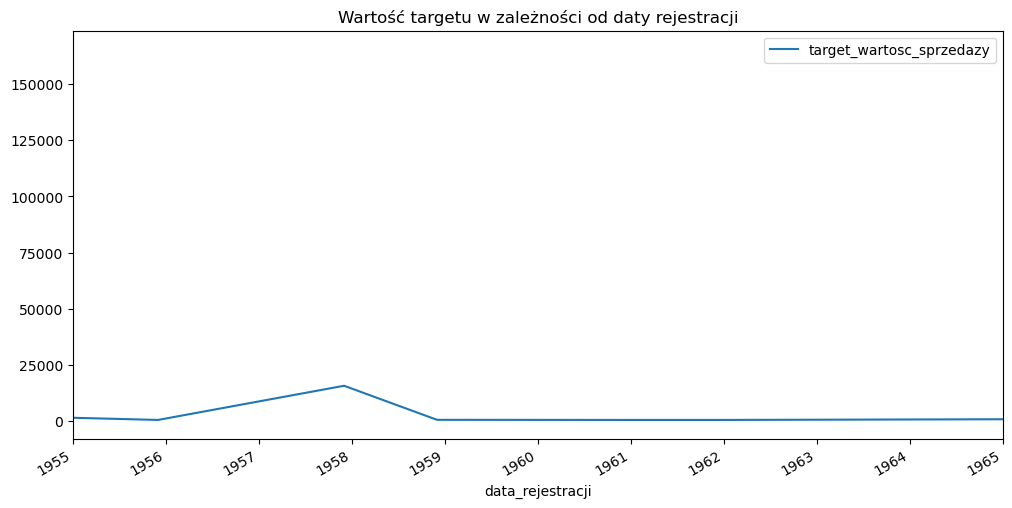

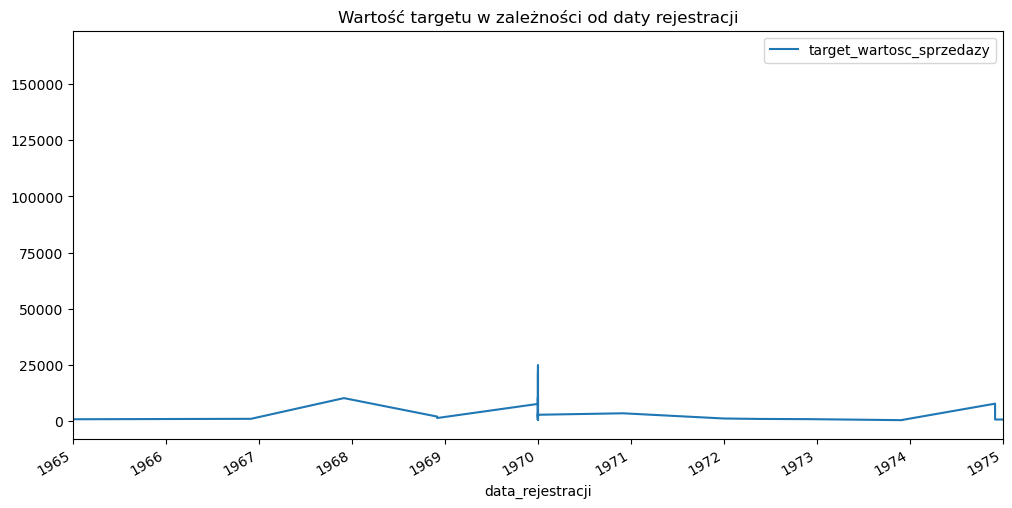

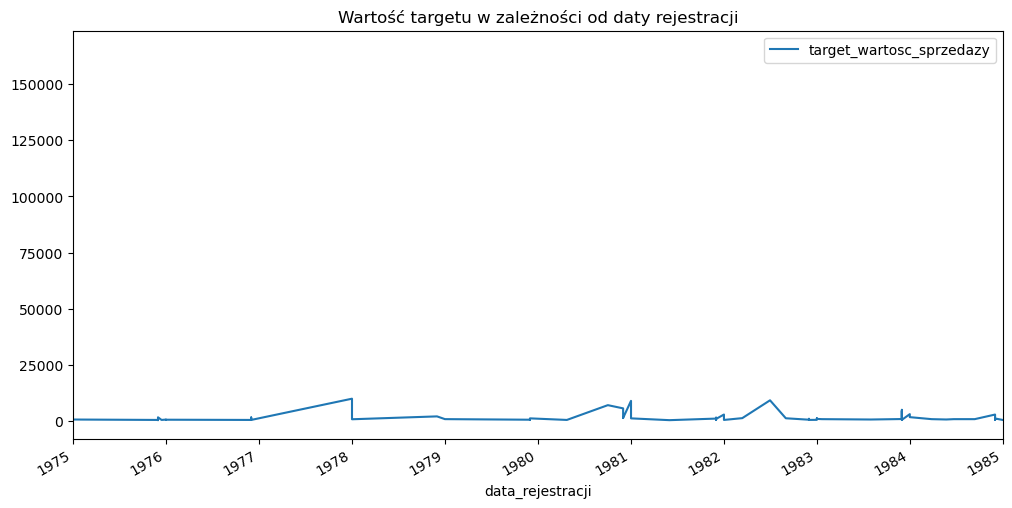

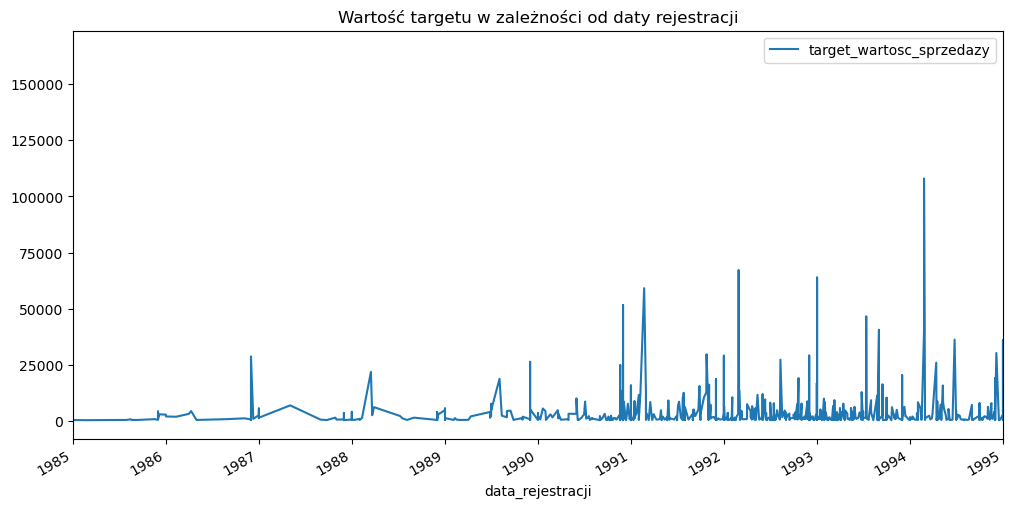

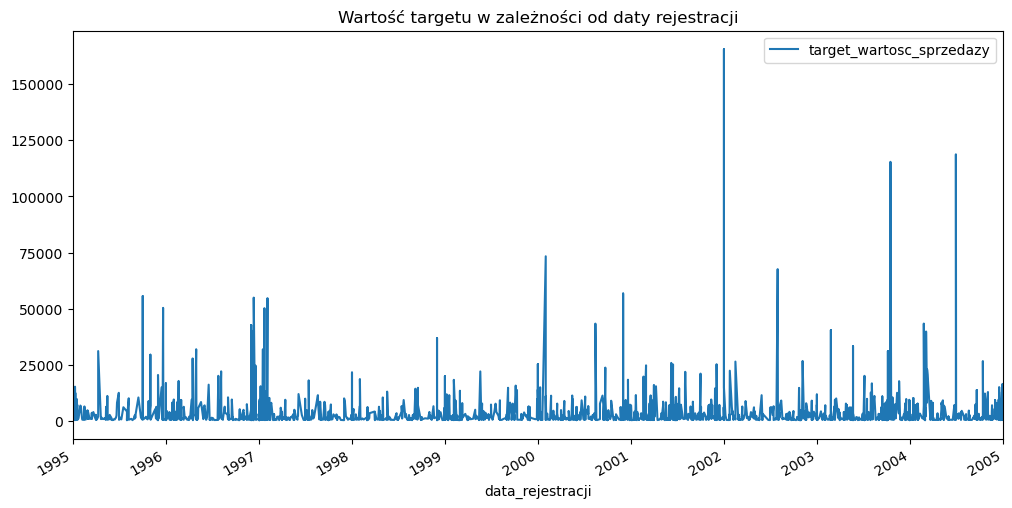

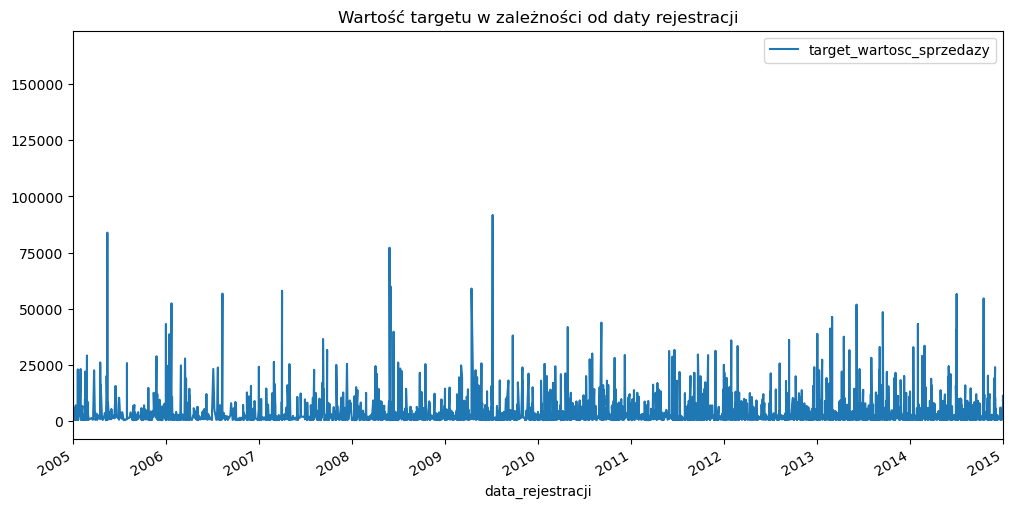

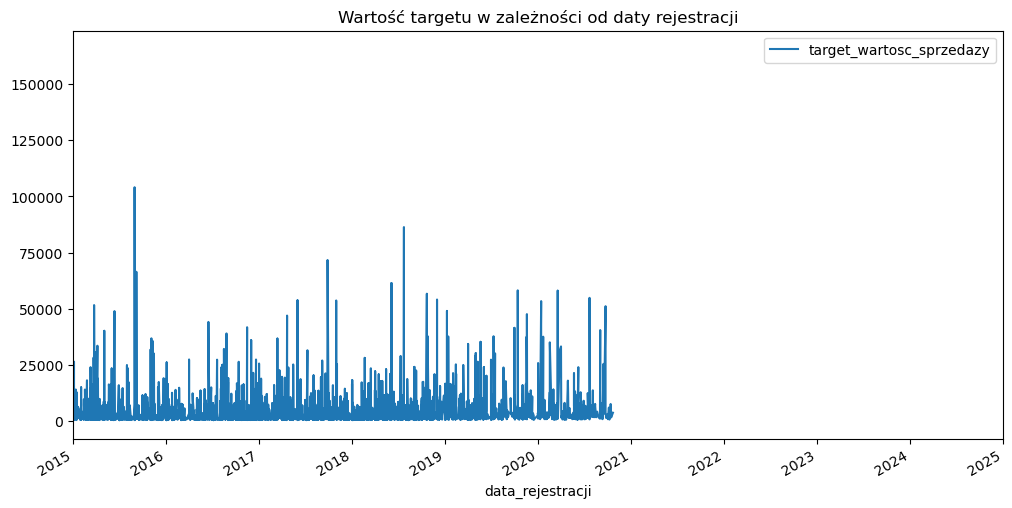

In [54]:
for year in range(1905, 2025, 10):
    df_date.plot(xlim = [f'{year}-01-01', f'{year + 10}-01-01'], figsize = (12, 6))
    plt.title('Wartość targetu w zależności od daty rejestracji')

In [55]:
df_date.resample(rule = 'A').max()

,target_wartosc_sprzedazy
data_rejestracji,
1909-12-31,1920.0
1910-12-31,NaN
1911-12-31,NaN
1912-12-31,NaN
1913-12-31,NaN
...,...
2016-12-31,44140.0
2017-12-31,71712.0
2018-12-31,86364.0


Maksymalna wartość targetu dla każdego roku rejestracji

<AxesSubplot: xlabel='data_rejestracji'>

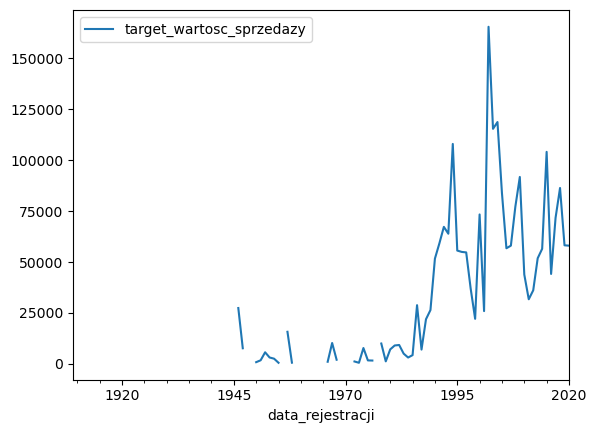

In [56]:
df_date.resample(rule = 'A').max().plot()

Minimalna wartość targetu dla każdego roku rejestracji

<AxesSubplot: xlabel='data_rejestracji'>

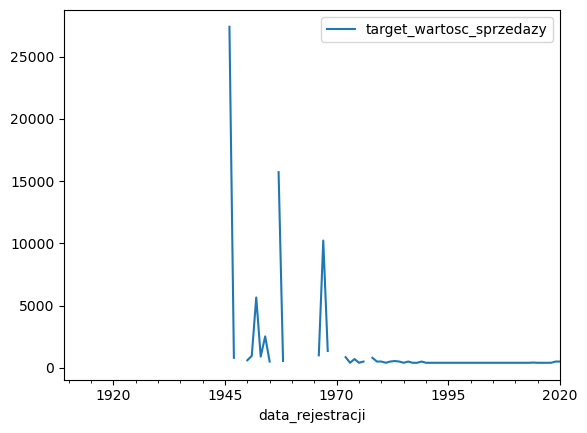

In [57]:
df_date.resample(rule = 'A').min().plot()

In [58]:
df[columns[6]] = df[columns[6]].dt.year

In [59]:
df.head()

,id,nazwa_wojewodztwa,kod_rynku,kod_branzy,liczba_pracownikow,zrodlo_rejestr,data_rejestracji,data_ostatnie_zamowienie,obecnosc_w_internecie,jakosc_strony_www,allegro,srednia_liczba_odslon,hurt,target_wartosc_sprzedazy
0,12259,slaskie,TYW,10001,21-50,KRS,2002,2020-06-30,e-commerce,98.0,TAK,8 278,1,165550.0
1,56795,malopolskie,NSW,98,6-10,KRS,2004,2020-08-28,ma stronê www,100.0,NIE,5 938,0,118759.0
2,12570,wielkopolskie,POW,10001,101-250,KRS,2003,2020-10-08,ma stronê www,79.0,NIE,11 542,1,115420.0
3,13285,slaskie,TYW,755,2-5,CEIDG,1994,2020-07-31,ma stronê www,70.0,TAK,5 400,0,108000.0
4,52504,zachodniopomorskie,SZW,755,6-10,KRS,2015,2020-03-05,ma stronê www,79.0,NIE,5 206,0,104111.0


In [60]:
df[columns[7]].info()

<class 'pandas.core.series.Series'>
Int64Index: 12245 entries, 0 to 12244
Series name: data_ostatnie_zamowienie
Non-Null Count  Dtype 
--------------  ----- 
12245 non-null  object
dtypes: object(1)
memory usage: 191.3+ KB


Zmiana typu kolumny z object na datatime w celu lepszej analizy

In [61]:
df[columns[7]] = pd.to_datetime(df[columns[7]])

In [62]:
df[columns[7]].describe()

C:\Users\otbgo\AppData\Local\Temp\ipykernel_15420\733896644.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[columns[7]].describe()


count                   12245
unique                    736
top       2020-09-30 00:00:00
freq                       57
first     2018-01-02 00:00:00
last      2020-10-27 00:00:00
Name: data_ostatnie_zamowienie, dtype: object

Tworzymy nową tymczasową tabelę zawierającą datę rejestru oraz target sprzedaży w celu łatwiejszej wizualizacji oraz analizy

In [63]:
df_date = df[[columns[7], columns[-1]]]

In [64]:
df_date.head()

,data_ostatnie_zamowienie,target_wartosc_sprzedazy
0,2020-06-30,165550.0
1,2020-08-28,118759.0
2,2020-10-08,115420.0
3,2020-07-31,108000.0
4,2020-03-05,104111.0


In [65]:
df_date.index = df_date[columns[7]]

In [66]:
df_date.drop(columns[7], axis = 1, inplace = True)

C:\Users\otbgo\AppData\Local\Temp\ipykernel_15420\3161565218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date.drop(columns[7], axis = 1, inplace = True)


In [67]:
df_date.head()

,target_wartosc_sprzedazy
data_ostatnie_zamowienie,
2020-06-30,165550.0
2020-08-28,118759.0
2020-10-08,115420.0
2020-07-31,108000.0
2020-03-05,104111.0


Text(0.5, 1.0, 'Wartość targetu w zależności od daty ostatniego zamówienia')

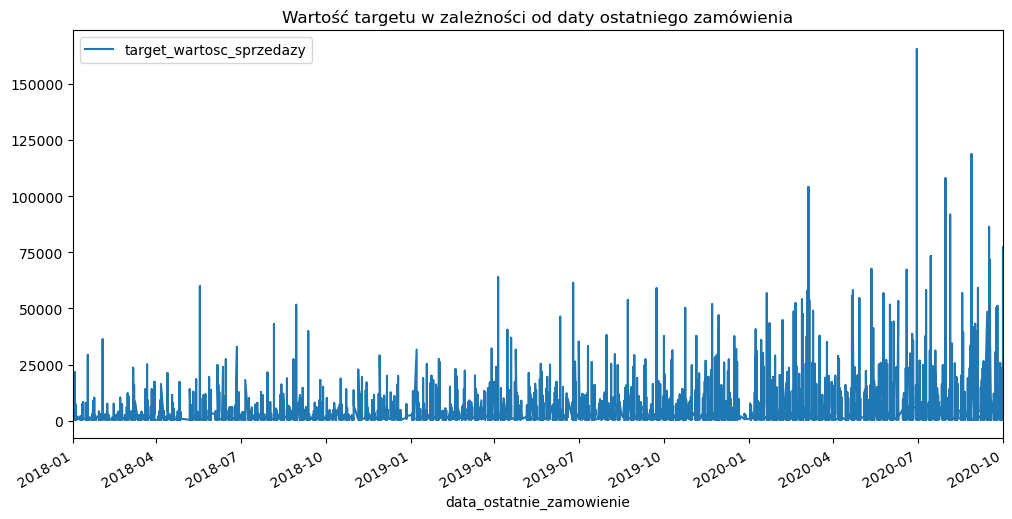

In [68]:
df_date.plot(xlim = ['2018-01', '2020-10'], figsize = (12, 6))
plt.title('Wartość targetu w zależności od daty ostatniego zamówienia')

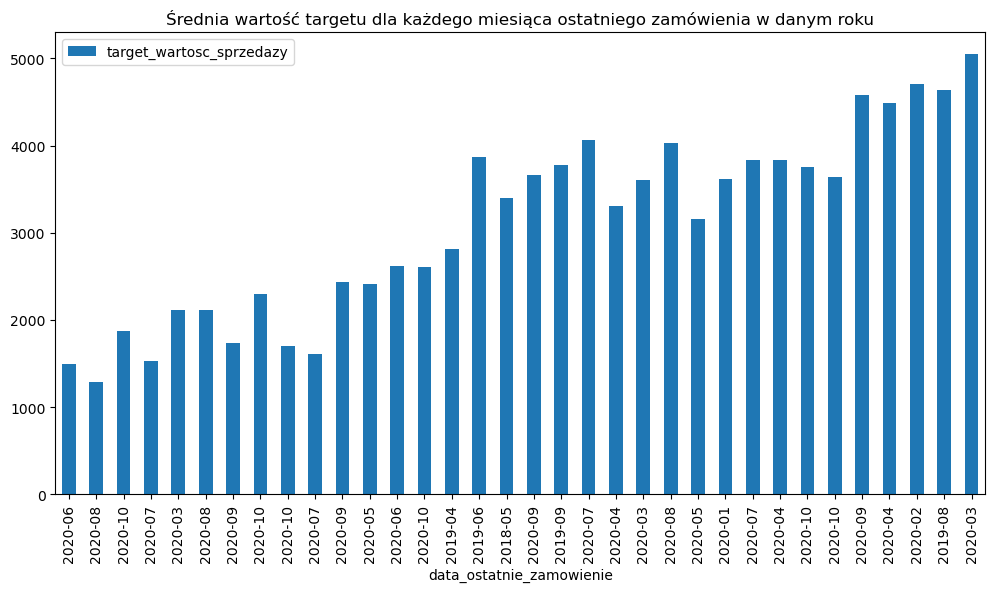

In [69]:
fig, ax = plt.subplots(figsize = (12,6))
df_date.resample(rule = 'M').mean().plot(kind='bar', ax=ax)
ax.xaxis.set_major_formatter(plt.FixedFormatter(df_date.index.strftime('%Y-%m')))
plt.title('Średnia wartość targetu dla każdego miesiąca ostatniego zamówienia w danym roku')
plt.show()

C:\Users\otbgo\AppData\Local\Temp\ipykernel_15420\1940233467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['month'] = df_date.index.month


Text(0.5, 1.0, 'Średnia wartość targetu dla każdego miesiąca ostatniego zamówienia')

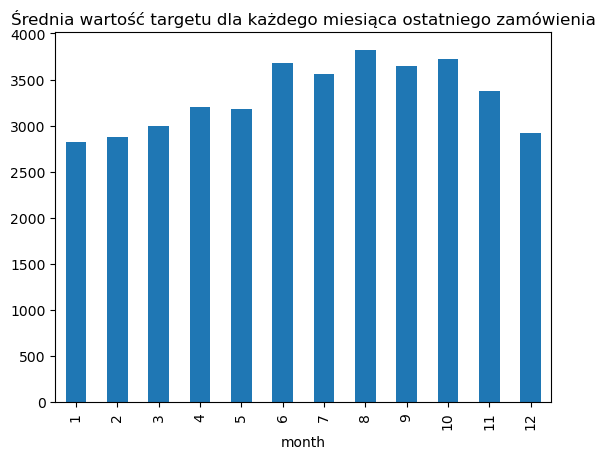

In [70]:
df_date['month'] = df_date.index.month
df_date.groupby(['month'])[columns[-1]].mean().plot(kind = 'bar')
plt.title('Średnia wartość targetu dla każdego miesiąca ostatniego zamówienia')

In [71]:
df[columns[7]] = df[columns[7]].dt.year

In [72]:
df.head()

,id,nazwa_wojewodztwa,kod_rynku,kod_branzy,liczba_pracownikow,zrodlo_rejestr,data_rejestracji,data_ostatnie_zamowienie,obecnosc_w_internecie,jakosc_strony_www,allegro,srednia_liczba_odslon,hurt,target_wartosc_sprzedazy
0,12259,slaskie,TYW,10001,21-50,KRS,2002,2020,e-commerce,98.0,TAK,8 278,1,165550.0
1,56795,malopolskie,NSW,98,6-10,KRS,2004,2020,ma stronê www,100.0,NIE,5 938,0,118759.0
2,12570,wielkopolskie,POW,10001,101-250,KRS,2003,2020,ma stronê www,79.0,NIE,11 542,1,115420.0
3,13285,slaskie,TYW,755,2-5,CEIDG,1994,2020,ma stronê www,70.0,TAK,5 400,0,108000.0
4,52504,zachodniopomorskie,SZW,755,6-10,KRS,2015,2020,ma stronê www,79.0,NIE,5 206,0,104111.0


In [73]:
df[columns[8]].info()

<class 'pandas.core.series.Series'>
Int64Index: 12245 entries, 0 to 12244
Series name: obecnosc_w_internecie
Non-Null Count  Dtype 
--------------  ----- 
12245 non-null  object
dtypes: object(1)
memory usage: 191.3+ KB


In [74]:
df[columns[8]].unique()

array(['e-commerce', 'ma stronê www', 'nie ma strony www'], dtype=object)

In [75]:
internet_existing = ['e-commerce', 'strona www', 'brak strony www']

Zmiana nazw danych w kolumnie

In [76]:
df[columns[8]].replace(df[columns[8]].unique(), internet_existing, inplace = True)

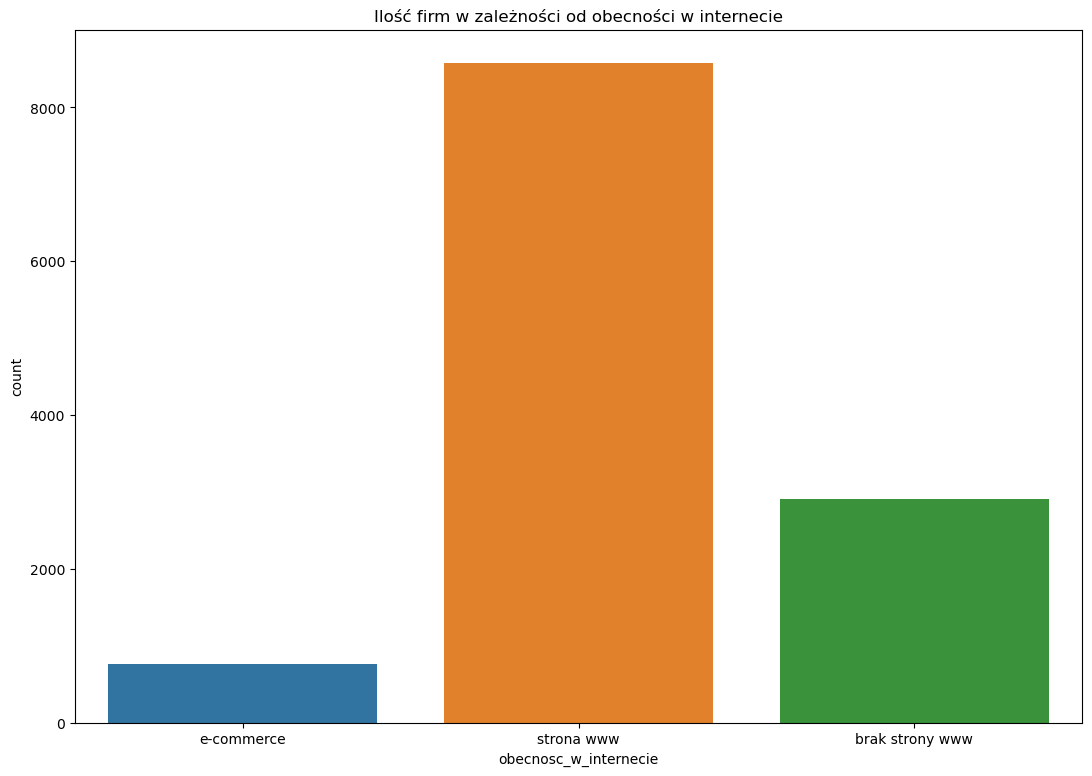

In [77]:
f, ax = plt.subplots(figsize=(13, 9))
sns.countplot(x = columns[8], data = df)
plt.title('Ilość firm w zależności od obecności w internecie')
plt.show()

In [78]:
df[columns[9]].info()

<class 'pandas.core.series.Series'>
Int64Index: 12245 entries, 0 to 12244
Series name: jakosc_strony_www
Non-Null Count  Dtype  
--------------  -----  
9344 non-null   float64
dtypes: float64(1)
memory usage: 191.3 KB


In [79]:
df[columns[9]].describe()

count    9344.000000
mean       57.320741
std        14.078706
min        35.000000
25%        46.000000
50%        56.000000
75%        66.000000
max       100.000000
Name: jakosc_strony_www, dtype: float64

In [80]:
df[columns[9]].isnull().sum()

2901

In [81]:
df[columns[9]].isnull().sum() / len(df)

0.23691302572478562

In [82]:
df[df[columns[9]].isnull() == True]

,id,nazwa_wojewodztwa,kod_rynku,kod_branzy,liczba_pracownikow,zrodlo_rejestr,data_rejestracji,data_ostatnie_zamowienie,obecnosc_w_internecie,jakosc_strony_www,allegro,srednia_liczba_odslon,hurt,target_wartosc_sprzedazy
10,64361,swietokrzyskie,KIW,1387,1,CEIDG,2017,2020,brak strony www,NaN,TAK,NaN,0,71712.0
42,76773,wielkopolskie,POW,652,NaN,CEIDG,2019,2020,brak strony www,NaN,TAK,NaN,1,49032.0
80,81124,slaskie,BBW,1386,NaN,CEIDG,2019,2019,brak strony www,NaN,TAK,NaN,1,37560.0
177,41397,zachodniopomorskie,SZW,1433,21-50,CEIDG,2007,2019,brak strony www,NaN,NIE,NaN,0,25350.0
298,59755,dolnoslaskie,WRW,526,NaN,CEIDG,2016,2020,brak strony www,NaN,TAK,NaN,0,19188.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12225,24953,lodzkie,LDW,755,1,CEIDG,2002,2020,brak strony www,NaN,NIE,NaN,0,400.0
12229,31152,slaskie,RBW,1574,NaN,CEIDG,2011,2019,brak strony www,NaN,NIE,NaN,0,400.0
12231,36728,slaskie,KTW,526,2-5,CEIDG,2011,2020,brak strony www,NaN,NIE,NaN,0,400.0
12235,51271,wielkopolskie,KLW,437,1,CEIDG,2016,2019,brak strony www,NaN,NIE,NaN,0,400.0


Zmiana wartości NaN na 0 z powodu braku strony internetowej

In [83]:
df[columns[9]].replace(np.nan, 0, inplace = True)

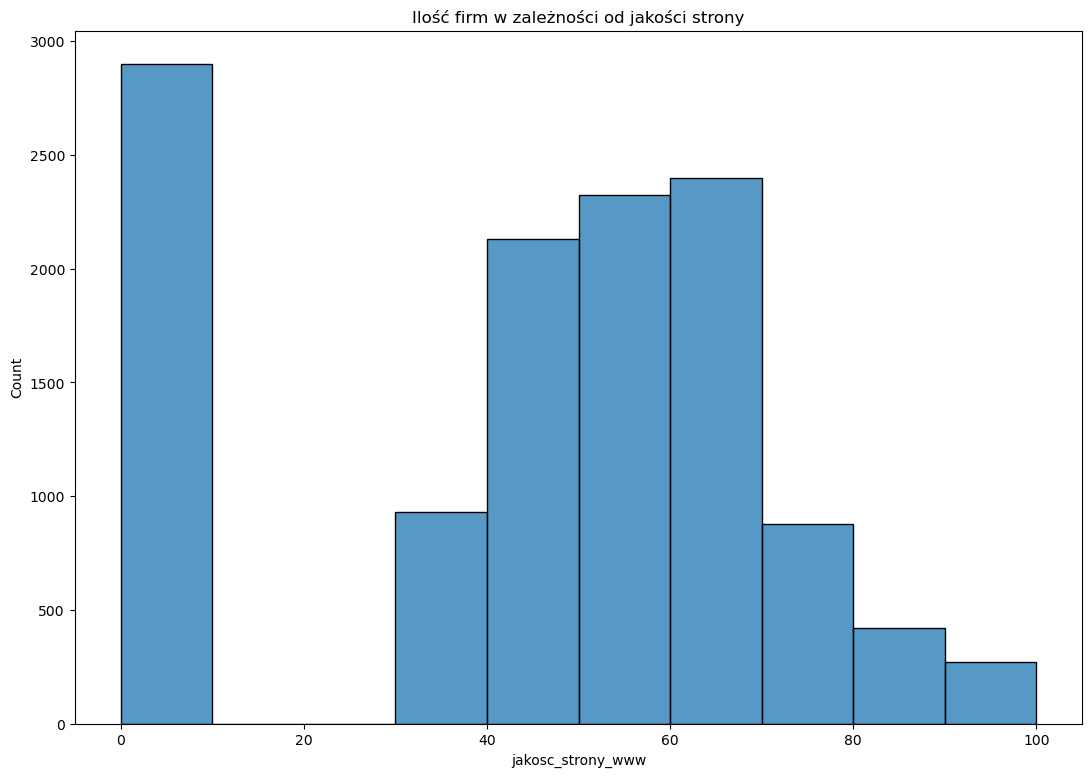

In [84]:
f, ax = plt.subplots(figsize=(13, 9))
sns.histplot(x = columns[9], bins = 10, data = df)
plt.title('Ilość firm w zależności od jakości strony')
plt.show()

In [85]:
df.head()

,id,nazwa_wojewodztwa,kod_rynku,kod_branzy,liczba_pracownikow,zrodlo_rejestr,data_rejestracji,data_ostatnie_zamowienie,obecnosc_w_internecie,jakosc_strony_www,allegro,srednia_liczba_odslon,hurt,target_wartosc_sprzedazy
0,12259,slaskie,TYW,10001,21-50,KRS,2002,2020,e-commerce,98.0,TAK,8 278,1,165550.0
1,56795,malopolskie,NSW,98,6-10,KRS,2004,2020,strona www,100.0,NIE,5 938,0,118759.0
2,12570,wielkopolskie,POW,10001,101-250,KRS,2003,2020,strona www,79.0,NIE,11 542,1,115420.0
3,13285,slaskie,TYW,755,2-5,CEIDG,1994,2020,strona www,70.0,TAK,5 400,0,108000.0
4,52504,zachodniopomorskie,SZW,755,6-10,KRS,2015,2020,strona www,79.0,NIE,5 206,0,104111.0


In [86]:
df[columns[10]].info()

<class 'pandas.core.series.Series'>
Int64Index: 12245 entries, 0 to 12244
Series name: allegro
Non-Null Count  Dtype 
--------------  ----- 
12245 non-null  object
dtypes: object(1)
memory usage: 191.3+ KB


In [87]:
df[columns[10]].unique()

array(['TAK', 'NIE'], dtype=object)

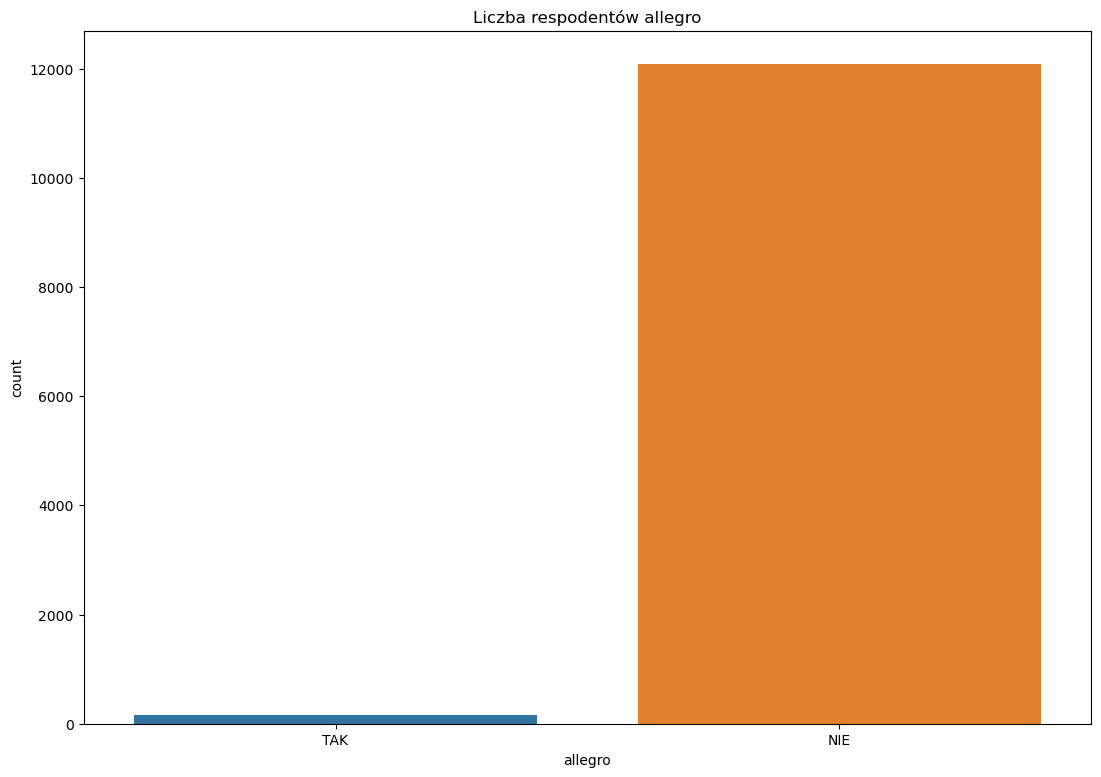

In [88]:
f, ax = plt.subplots(figsize=(13, 9))
sns.countplot(x = columns[10], data = df)
plt.title('Liczba respodentów allegro')
plt.show()

In [89]:
print(f'{len(df[df[columns[10]] == "NIE"]) / len(df)}% firm nie ma konta na allegro')

0.987260106165782% firm nie ma konta na allegro


In [90]:
df.head()

,id,nazwa_wojewodztwa,kod_rynku,kod_branzy,liczba_pracownikow,zrodlo_rejestr,data_rejestracji,data_ostatnie_zamowienie,obecnosc_w_internecie,jakosc_strony_www,allegro,srednia_liczba_odslon,hurt,target_wartosc_sprzedazy
0,12259,slaskie,TYW,10001,21-50,KRS,2002,2020,e-commerce,98.0,TAK,8 278,1,165550.0
1,56795,malopolskie,NSW,98,6-10,KRS,2004,2020,strona www,100.0,NIE,5 938,0,118759.0
2,12570,wielkopolskie,POW,10001,101-250,KRS,2003,2020,strona www,79.0,NIE,11 542,1,115420.0
3,13285,slaskie,TYW,755,2-5,CEIDG,1994,2020,strona www,70.0,TAK,5 400,0,108000.0
4,52504,zachodniopomorskie,SZW,755,6-10,KRS,2015,2020,strona www,79.0,NIE,5 206,0,104111.0


In [91]:
df[columns[11]].info()

<class 'pandas.core.series.Series'>
Int64Index: 12245 entries, 0 to 12244
Series name: srednia_liczba_odslon
Non-Null Count  Dtype 
--------------  ----- 
9344 non-null   object
dtypes: object(1)
memory usage: 191.3+ KB


Zmiana typu kolumny na int 

In [92]:
df[columns[11]] = df[columns[11]].astype(str).str.replace(' ', '')
df[columns[11]] = pd.to_numeric(df[columns[11]], errors='coerce').fillna(0).astype(int)

In [93]:
df[columns[11]].describe()

count    12245.000000
mean       158.666394
std        374.122252
min          0.000000
25%         13.000000
50%         56.000000
75%        136.000000
max      11542.000000
Name: srednia_liczba_odslon, dtype: float64

In [94]:
df[df[columns[11]] > 5000]

,id,nazwa_wojewodztwa,kod_rynku,kod_branzy,liczba_pracownikow,zrodlo_rejestr,data_rejestracji,data_ostatnie_zamowienie,obecnosc_w_internecie,jakosc_strony_www,allegro,srednia_liczba_odslon,hurt,target_wartosc_sprzedazy
0,12259,slaskie,TYW,10001,21-50,KRS,2002,2020,e-commerce,98.0,TAK,8278,1,165550.0
1,56795,malopolskie,NSW,98,6-10,KRS,2004,2020,strona www,100.0,NIE,5938,0,118759.0
2,12570,wielkopolskie,POW,10001,101-250,KRS,2003,2020,strona www,79.0,NIE,11542,1,115420.0
3,13285,slaskie,TYW,755,2-5,CEIDG,1994,2020,strona www,70.0,TAK,5400,0,108000.0
4,52504,zachodniopomorskie,SZW,755,6-10,KRS,2015,2020,strona www,79.0,NIE,5206,0,104111.0
8,22750,dolnoslaskie,WRW,1387,101-250,KRS,2008,2020,strona www,89.0,NIE,7719,0,77186.0
12,41681,dolnoslaskie,WBW,10001,101-250,KRS,1992,2020,strona www,89.0,NIE,6727,1,67270.0
14,9173,mazowieckie,WAW,1433,101-250,KRS,1993,2019,strona www,98.0,NIE,6390,1,63900.0
16,30350,slaskie,RBW,1387,101-250,KRS,2008,2018,e-commerce,93.0,TAK,5994,1,59940.0


Ilość odsłon jest zerowa, ponieważ firmy nie posiadają strony internetowej

In [95]:
df[df[columns[11]] == 0]

,id,nazwa_wojewodztwa,kod_rynku,kod_branzy,liczba_pracownikow,zrodlo_rejestr,data_rejestracji,data_ostatnie_zamowienie,obecnosc_w_internecie,jakosc_strony_www,allegro,srednia_liczba_odslon,hurt,target_wartosc_sprzedazy
10,64361,swietokrzyskie,KIW,1387,1,CEIDG,2017,2020,brak strony www,0.0,TAK,0,0,71712.0
42,76773,wielkopolskie,POW,652,NaN,CEIDG,2019,2020,brak strony www,0.0,TAK,0,1,49032.0
80,81124,slaskie,BBW,1386,NaN,CEIDG,2019,2019,brak strony www,0.0,TAK,0,1,37560.0
177,41397,zachodniopomorskie,SZW,1433,21-50,CEIDG,2007,2019,brak strony www,0.0,NIE,0,0,25350.0
298,59755,dolnoslaskie,WRW,526,NaN,CEIDG,2016,2020,brak strony www,0.0,TAK,0,0,19188.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12225,24953,lodzkie,LDW,755,1,CEIDG,2002,2020,brak strony www,0.0,NIE,0,0,400.0
12229,31152,slaskie,RBW,1574,NaN,CEIDG,2011,2019,brak strony www,0.0,NIE,0,0,400.0
12231,36728,slaskie,KTW,526,2-5,CEIDG,2011,2020,brak strony www,0.0,NIE,0,0,400.0
12235,51271,wielkopolskie,KLW,437,1,CEIDG,2016,2019,brak strony www,0.0,NIE,0,0,400.0


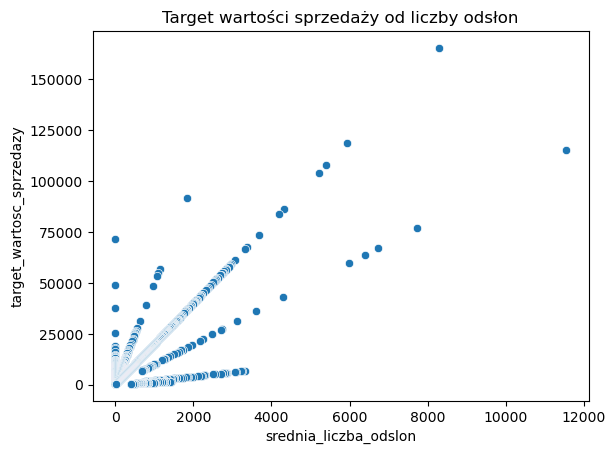

In [96]:
sns.scatterplot(x = 'srednia_liczba_odslon', y = 'target_wartosc_sprzedazy', data = df)
plt.xlabel('srednia_liczba_odslon')
plt.ylabel('target_wartosc_sprzedazy')
plt.title('Target wartości sprzedaży od liczby odsłon')
plt.show()

In [97]:
df[columns[12]].info()

<class 'pandas.core.series.Series'>
Int64Index: 12245 entries, 0 to 12244
Series name: hurt
Non-Null Count  Dtype
--------------  -----
12245 non-null  int64
dtypes: int64(1)
memory usage: 191.3 KB


Zmiana kolumny na kategoryczną

In [98]:
df[columns[12]].replace([0, 1], ['NIE', 'TAK'], inplace = True)

In [99]:
df[columns[12]].describe()

count     12245
unique        2
top         NIE
freq       9804
Name: hurt, dtype: object

In [100]:
df[columns[12]].unique()

array(['TAK', 'NIE'], dtype=object)

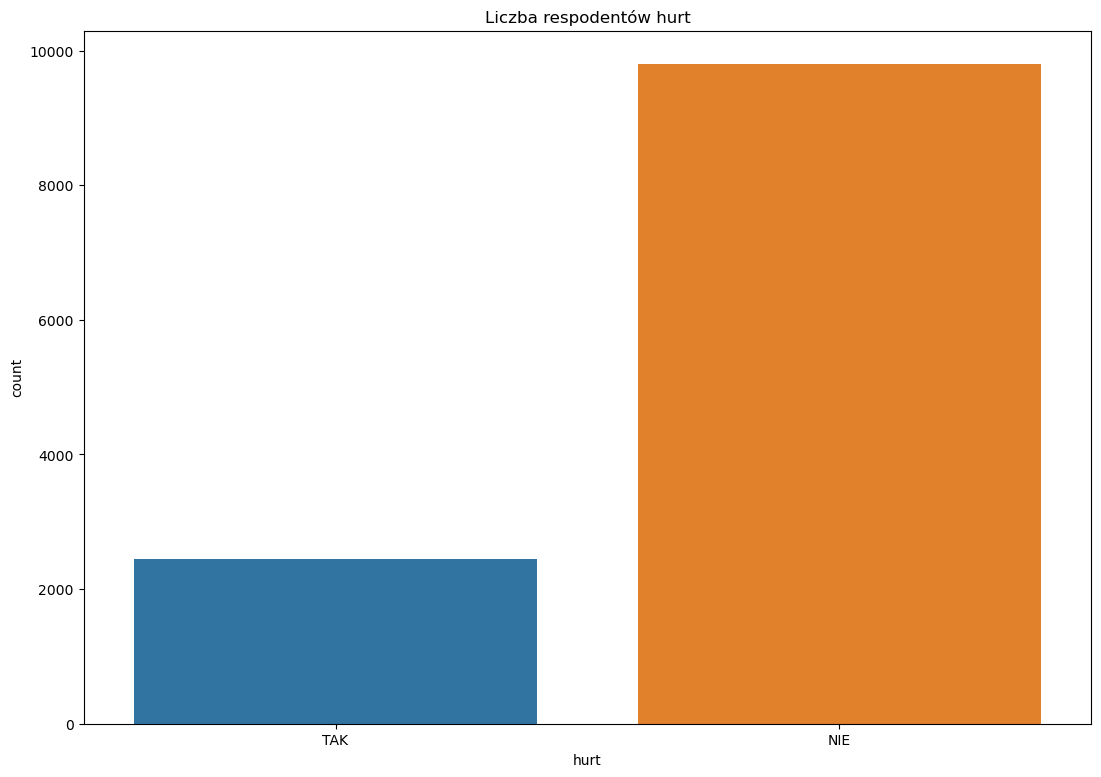

In [101]:
f, ax = plt.subplots(figsize=(13, 9))
sns.countplot(x = columns[12], data = df)
plt.title('Liczba respodentów hurt')
plt.show()

In [102]:
print(f'{len(df[df[columns[12]] == "NIE"]) / len(df)}% firm ma sprzedaż hurtową')

0.8006533278889343% firm ma sprzedaż hurtową


In [103]:
df[columns[13]].info()

<class 'pandas.core.series.Series'>
Int64Index: 12245 entries, 0 to 12244
Series name: target_wartosc_sprzedazy
Non-Null Count  Dtype  
--------------  -----  
12245 non-null  float64
dtypes: float64(1)
memory usage: 191.3 KB


In [104]:
df[columns[13]].describe()

count     12245.000000
mean       3337.702409
std        6308.210883
min         400.000000
25%         800.000000
50%        1451.000000
75%        3003.000000
max      165550.000000
Name: target_wartosc_sprzedazy, dtype: float64

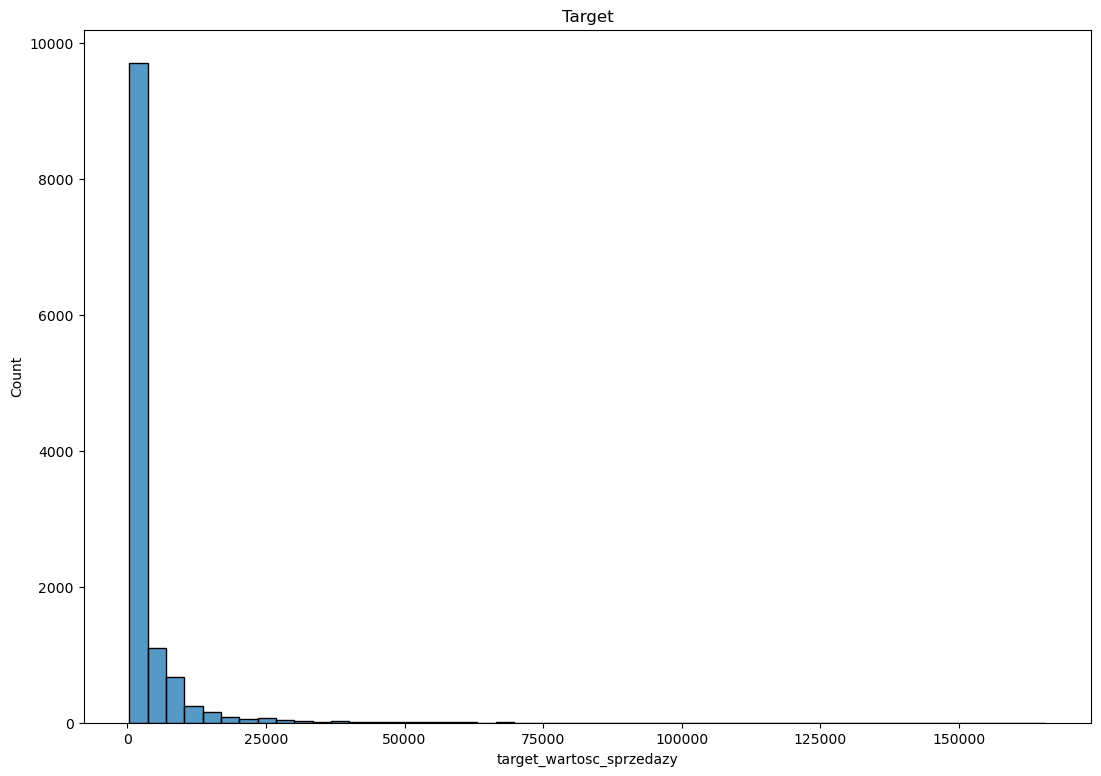

In [105]:
f, ax = plt.subplots(figsize=(13, 9))
sns.histplot(x = columns[13], bins = 50, data = df)
plt.title('Target')
plt.show()

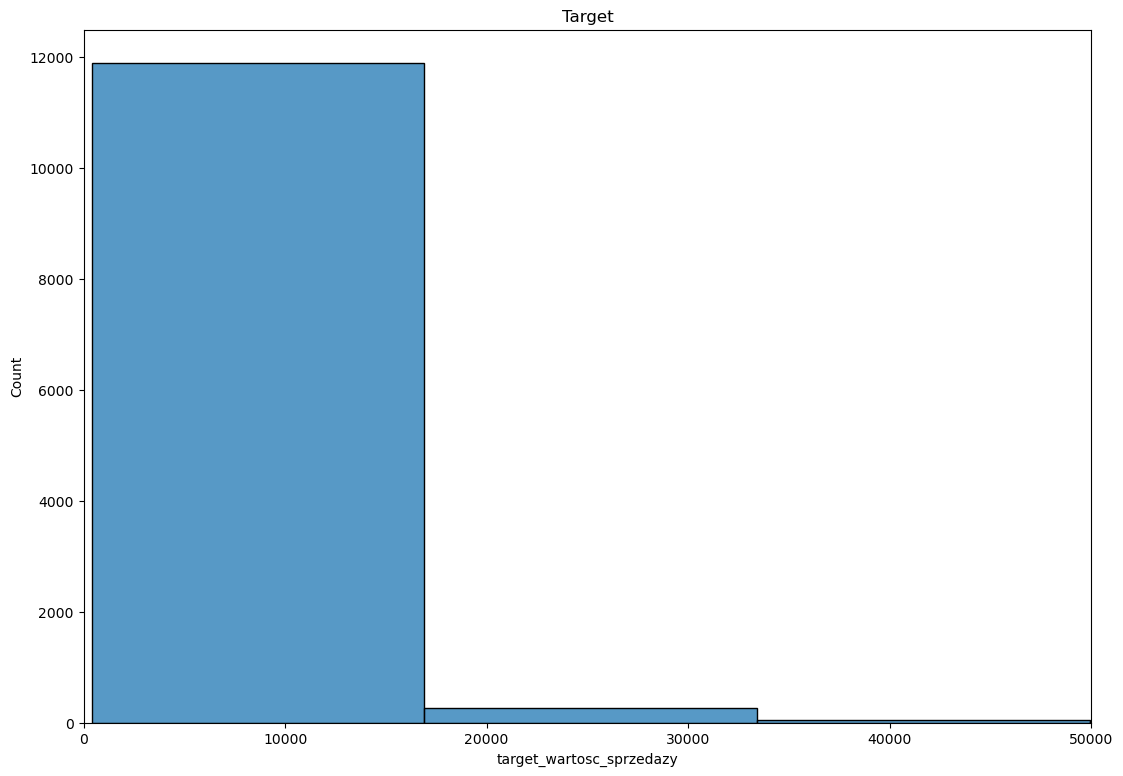

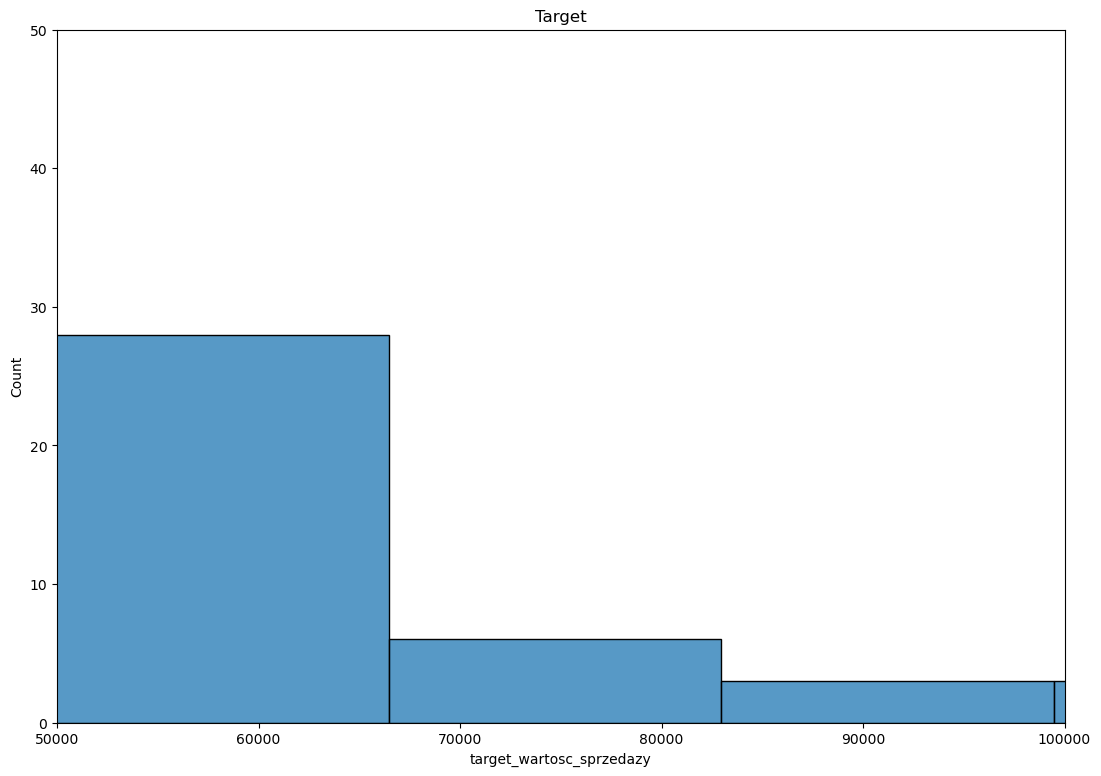

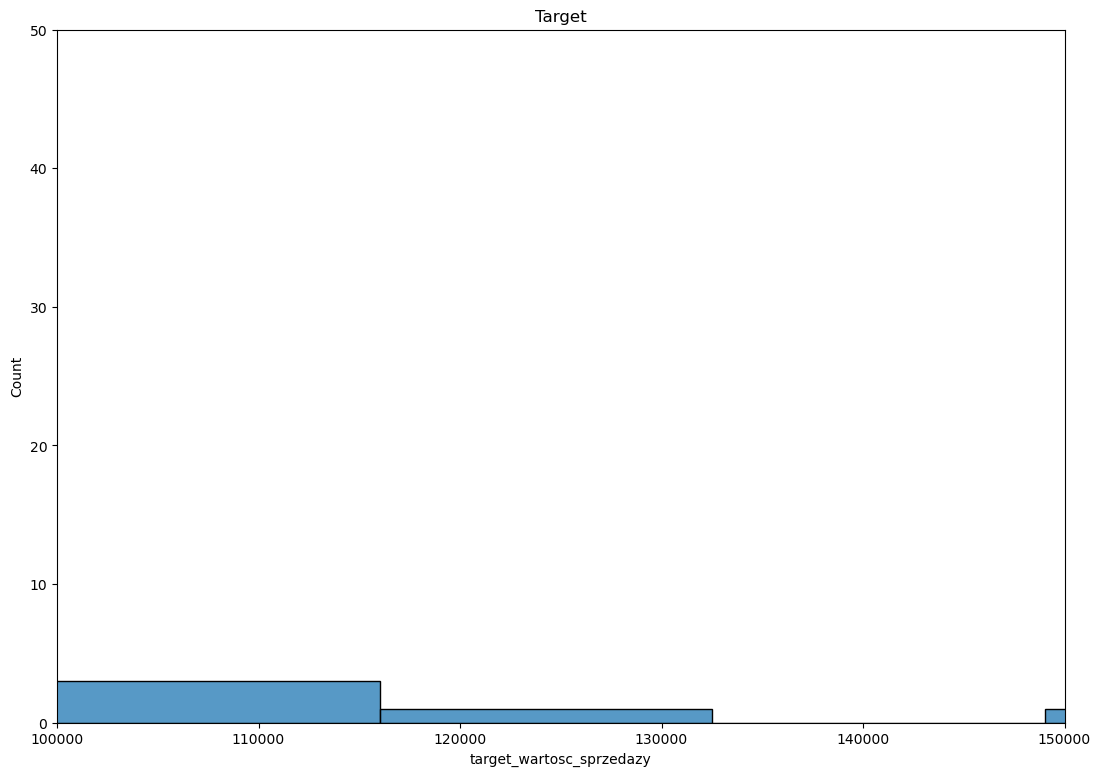

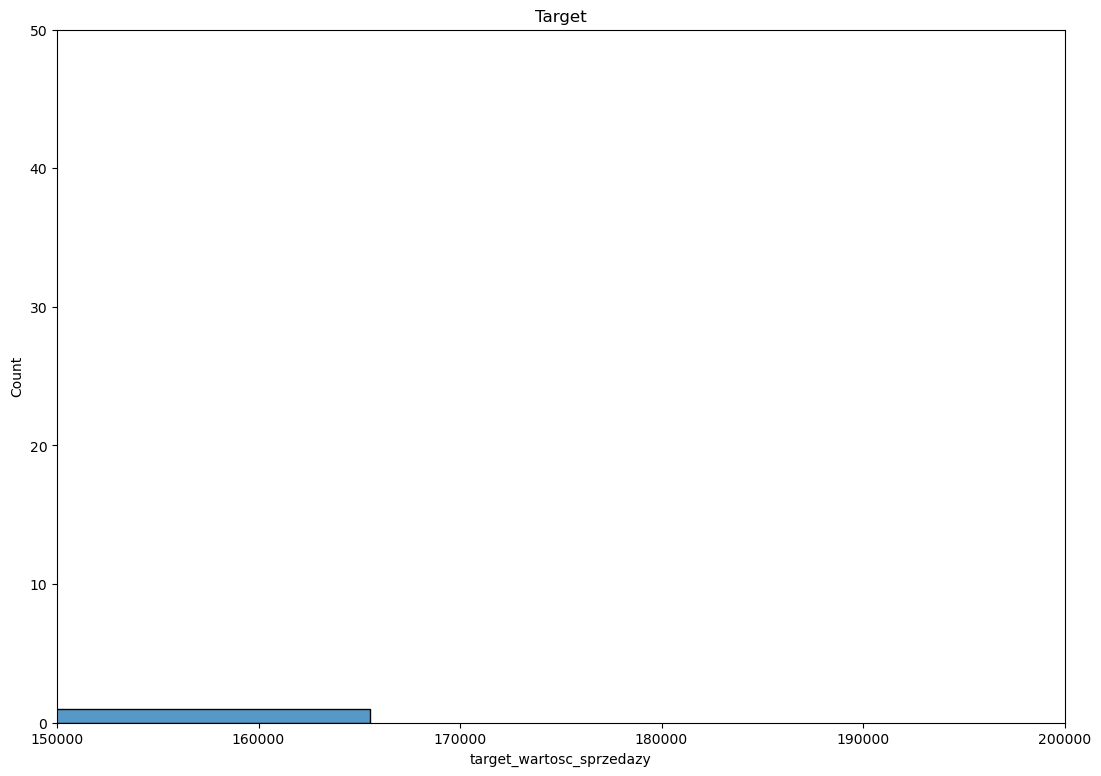

In [106]:
for target in range(0, 200000, 50000):
    f, ax = plt.subplots(figsize=(13, 9))
    sns.histplot(x = columns[13], bins = 10, data = df)
    plt.title('Target')
    plt.xlim([target, target + 50000])
    if target > 49999:
        plt.ylim(0, 50)
    plt.show()

In [107]:
df[columns[13]].describe()

count     12245.000000
mean       3337.702409
std        6308.210883
min         400.000000
25%         800.000000
50%        1451.000000
75%        3003.000000
max      165550.000000
Name: target_wartosc_sprzedazy, dtype: float64

In [108]:
df[df[columns[13]] > 50000]

,id,nazwa_wojewodztwa,kod_rynku,kod_branzy,liczba_pracownikow,zrodlo_rejestr,data_rejestracji,data_ostatnie_zamowienie,obecnosc_w_internecie,jakosc_strony_www,allegro,srednia_liczba_odslon,hurt,target_wartosc_sprzedazy
0,12259,slaskie,TYW,10001,21-50,KRS,2002,2020,e-commerce,98.0,TAK,8278,TAK,165550.0
1,56795,malopolskie,NSW,98,6-10,KRS,2004,2020,strona www,100.0,NIE,5938,NIE,118759.0
2,12570,wielkopolskie,POW,10001,101-250,KRS,2003,2020,strona www,79.0,NIE,11542,TAK,115420.0
3,13285,slaskie,TYW,755,2-5,CEIDG,1994,2020,strona www,70.0,TAK,5400,NIE,108000.0
4,52504,zachodniopomorskie,SZW,755,6-10,KRS,2015,2020,strona www,79.0,NIE,5206,NIE,104111.0
5,65103,mazowieckie,WAW,907,1,CEIDG,2009,2020,e-commerce,70.0,NIE,1836,TAK,91778.0
6,71581,slaskie,KTW,1387,NaN,CEIDG,2018,2020,strona www,85.0,TAK,4318,NIE,86364.0
7,25906,malopolskie,TRW,10001,6-10,KRS,2005,2020,strona www,98.0,NIE,4195,NIE,83904.0
8,22750,dolnoslaskie,WRW,1387,101-250,KRS,2008,2020,strona www,89.0,NIE,7719,NIE,77186.0
9,4259,lubelskie,LBW,755,2-5,KRS,2000,2020,strona www,72.0,NIE,3668,TAK,73362.0


In [109]:
from pandas_profiling import ProfileReport

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

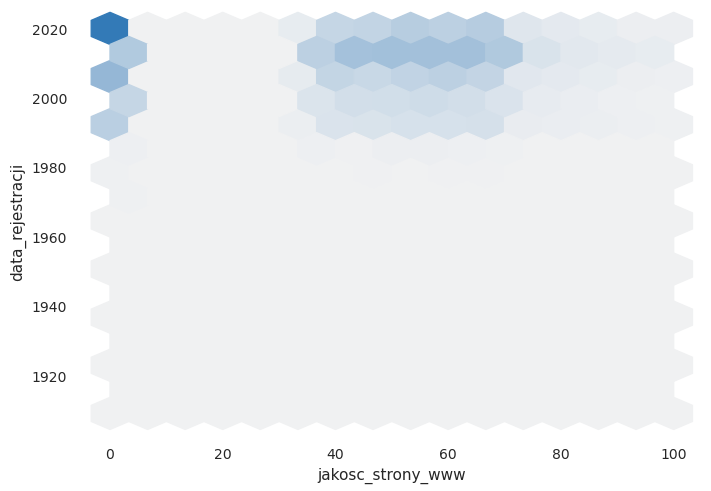

In [110]:
report = ProfileReport(df)
report.to_file('report.html')

In [111]:
df.drop('id', axis = 1, inplace = True)

In [112]:
df['kod_rynku'][df['nazwa_wojewodztwa'] == 'slaskie'].unique()

array(['TYW', 'KTW', 'BBW', 'RBW', 'DGW', 'GLW', 'CZW'], dtype=object)

In [113]:
df['kod_rynku'][df['nazwa_wojewodztwa'] == 'dolnoslaskie'].unique()

array(['WRW', 'WBW', 'JGW', 'LGW'], dtype=object)

In [114]:
df.head()

,nazwa_wojewodztwa,kod_rynku,kod_branzy,liczba_pracownikow,zrodlo_rejestr,data_rejestracji,data_ostatnie_zamowienie,obecnosc_w_internecie,jakosc_strony_www,allegro,srednia_liczba_odslon,hurt,target_wartosc_sprzedazy
0,slaskie,TYW,10001,21-50,KRS,2002,2020,e-commerce,98.0,TAK,8278,TAK,165550.0
1,malopolskie,NSW,98,6-10,KRS,2004,2020,strona www,100.0,NIE,5938,NIE,118759.0
2,wielkopolskie,POW,10001,101-250,KRS,2003,2020,strona www,79.0,NIE,11542,TAK,115420.0
3,slaskie,TYW,755,2-5,CEIDG,1994,2020,strona www,70.0,TAK,5400,NIE,108000.0
4,zachodniopomorskie,SZW,755,6-10,KRS,2015,2020,strona www,79.0,NIE,5206,NIE,104111.0


In [115]:
df[columns[-1]].info()

<class 'pandas.core.series.Series'>
Int64Index: 12245 entries, 0 to 12244
Series name: target_wartosc_sprzedazy
Non-Null Count  Dtype  
--------------  -----  
12245 non-null  float64
dtypes: float64(1)
memory usage: 191.3 KB


In [116]:
df[columns[-1]].describe()

count     12245.000000
mean       3337.702409
std        6308.210883
min         400.000000
25%         800.000000
50%        1451.000000
75%        3003.000000
max      165550.000000
Name: target_wartosc_sprzedazy, dtype: float64

<AxesSubplot: ylabel='target_wartosc_sprzedazy'>

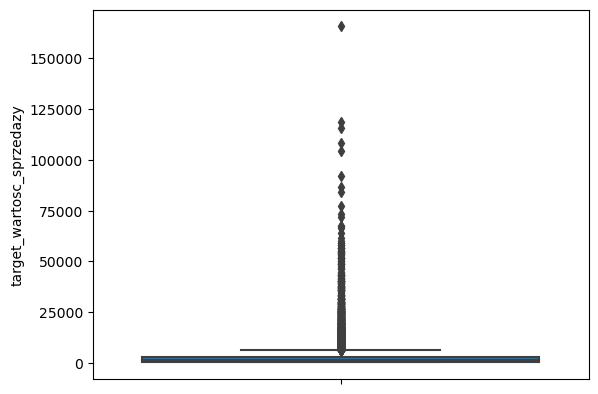

In [117]:
sns.boxplot(y = 'target_wartosc_sprzedazy', data = df)

<AxesSubplot: >

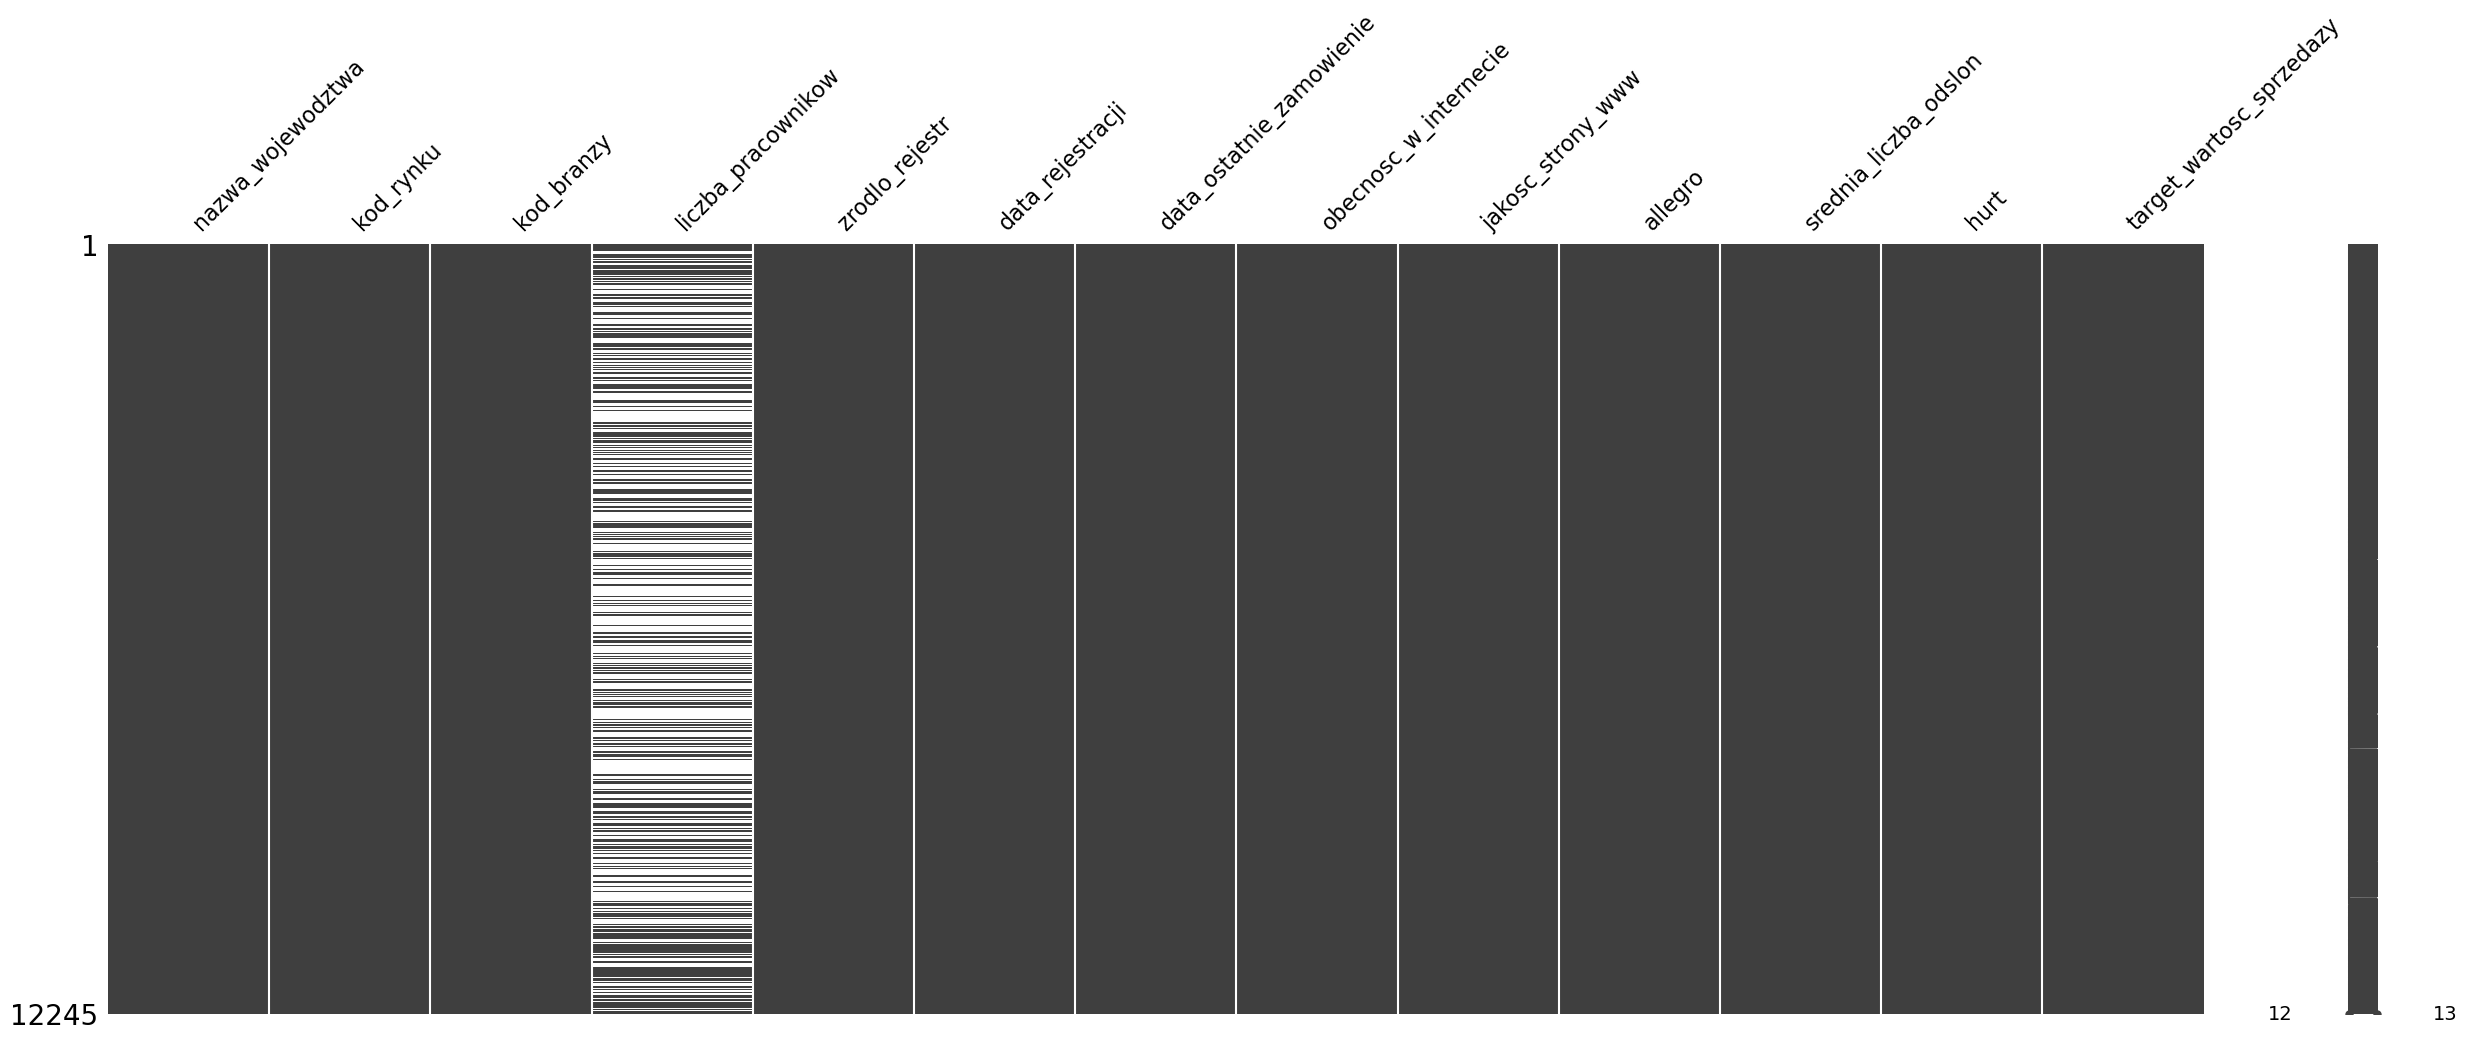

In [118]:
missingno.matrix(df, figsize = (30,10))

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12245 entries, 0 to 12244
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   nazwa_wojewodztwa         12245 non-null  object 
 1   kod_rynku                 12245 non-null  object 
 2   kod_branzy                12245 non-null  object 
 3   liczba_pracownikow        5123 non-null   object 
 4   zrodlo_rejestr            12245 non-null  object 
 5   data_rejestracji          12245 non-null  int64  
 6   data_ostatnie_zamowienie  12245 non-null  int64  
 7   obecnosc_w_internecie     12245 non-null  object 
 8   jakosc_strony_www         12245 non-null  float64
 9   allegro                   12245 non-null  object 
 10  srednia_liczba_odslon     12245 non-null  int32  
 11  hurt                      12245 non-null  object 
 12  target_wartosc_sprzedazy  12245 non-null  float64
dtypes: float64(2), int32(1), int64(2), object(8)
memory usage: 1.

In [120]:
df.head()

,nazwa_wojewodztwa,kod_rynku,kod_branzy,liczba_pracownikow,zrodlo_rejestr,data_rejestracji,data_ostatnie_zamowienie,obecnosc_w_internecie,jakosc_strony_www,allegro,srednia_liczba_odslon,hurt,target_wartosc_sprzedazy
0,slaskie,TYW,10001,21-50,KRS,2002,2020,e-commerce,98.0,TAK,8278,TAK,165550.0
1,malopolskie,NSW,98,6-10,KRS,2004,2020,strona www,100.0,NIE,5938,NIE,118759.0
2,wielkopolskie,POW,10001,101-250,KRS,2003,2020,strona www,79.0,NIE,11542,TAK,115420.0
3,slaskie,TYW,755,2-5,CEIDG,1994,2020,strona www,70.0,TAK,5400,NIE,108000.0
4,zachodniopomorskie,SZW,755,6-10,KRS,2015,2020,strona www,79.0,NIE,5206,NIE,104111.0


In [121]:
df.drop(columns[4], axis = 1, inplace = True)

In [122]:
df.head()

,nazwa_wojewodztwa,kod_rynku,kod_branzy,zrodlo_rejestr,data_rejestracji,data_ostatnie_zamowienie,obecnosc_w_internecie,jakosc_strony_www,allegro,srednia_liczba_odslon,hurt,target_wartosc_sprzedazy
0,slaskie,TYW,10001,KRS,2002,2020,e-commerce,98.0,TAK,8278,TAK,165550.0
1,malopolskie,NSW,98,KRS,2004,2020,strona www,100.0,NIE,5938,NIE,118759.0
2,wielkopolskie,POW,10001,KRS,2003,2020,strona www,79.0,NIE,11542,TAK,115420.0
3,slaskie,TYW,755,CEIDG,1994,2020,strona www,70.0,TAK,5400,NIE,108000.0
4,zachodniopomorskie,SZW,755,KRS,2015,2020,strona www,79.0,NIE,5206,NIE,104111.0


In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X = df.drop(columns[-1], axis = 1)
y = df[columns[-1]]

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [126]:
y_train= pd.to_numeric(y_train, errors='coerce').astype(float)
y_test= pd.to_numeric(y_test, errors='coerce').astype(float)from sklearn.pipeline import make_pipeline

In [127]:
from sklearn.pipeline import make_pipeline, FeatureUnion
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [128]:
df.head()

,nazwa_wojewodztwa,kod_rynku,kod_branzy,zrodlo_rejestr,data_rejestracji,data_ostatnie_zamowienie,obecnosc_w_internecie,jakosc_strony_www,allegro,srednia_liczba_odslon,hurt,target_wartosc_sprzedazy
0,slaskie,TYW,10001,KRS,2002,2020,e-commerce,98.0,TAK,8278,TAK,165550.0
1,malopolskie,NSW,98,KRS,2004,2020,strona www,100.0,NIE,5938,NIE,118759.0
2,wielkopolskie,POW,10001,KRS,2003,2020,strona www,79.0,NIE,11542,TAK,115420.0
3,slaskie,TYW,755,CEIDG,1994,2020,strona www,70.0,TAK,5400,NIE,108000.0
4,zachodniopomorskie,SZW,755,KRS,2015,2020,strona www,79.0,NIE,5206,NIE,104111.0


In [129]:
numerics = ['int32', 'int64', 'float64']
categorical = ['object']
numeric_columns = list(X.select_dtypes(include = numerics).columns)
categorical_columns = list(X.select_dtypes(include = categorical).columns)

In [ ]:
X.columns

In [ ]:
categorical_columns

In [ ]:
numeric_columns

In [ ]:
cat_cols_1 = ['allegro', 'hurt', 'zrodlo_rejestr']
cat_cols_2 = ['nazwa_wojewodztwa', 'allegro', 'hurt', 'zrodlo_rejestr']
cat_cols_3 = ['kod_rynku', 'allegro', 'hurt', 'zrodlo_rejestr']
cat_cols_4 = ['nazwa_wojewodztwa', 'kod_branzy', 'obecnosc_w_internecie']
cat_cols_5 = ['kod_rynku', 'kod_branzy', 'obecnosc_w_internecie']

In [ ]:
ct1 = make_column_transformer((StandardScaler(), numeric_columns), 
                              (OneHotEncoder(), categorical_columns),
                              remainder = 'drop')
ct2 = make_column_transformer((StandardScaler(), numeric_columns), 
                              (OneHotEncoder(), cat_cols_1),
                              remainder = 'drop')
ct3 = make_column_transformer((StandardScaler(), numeric_columns), 
                              (OneHotEncoder(), cat_cols_2),
                              remainder = 'drop')
ct4 = make_column_transformer((StandardScaler(), numeric_columns), 
                              (OneHotEncoder(), cat_cols_3),
                              remainder = 'drop')
ct5 = make_column_transformer((StandardScaler(), numeric_columns), 
                              (OneHotEncoder(), cat_cols_4),
                              remainder = 'drop')
ct6 = make_column_transformer((StandardScaler(), numeric_columns), 
                              (OneHotEncoder(), cat_cols_5),
                              remainder = 'drop')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
pipelines = {
    'rfc_ct1': make_pipeline(ct1, RandomForestRegressor()),
    'rfc_ct2': make_pipeline(ct2, RandomForestRegressor()),
    'rfc_ct3': make_pipeline(ct3, RandomForestRegressor()),
    'rfc_ct4': make_pipeline(ct4, RandomForestRegressor()),
    'rfc_ct5': make_pipeline(ct5, RandomForestRegressor()),
    'rfc_ct6': make_pipeline(ct6, RandomForestRegressor()),
    'svr_ct1': make_pipeline(ct1, SVR()),
    'svr_ct2': make_pipeline(ct2, SVR()),
    'svr_ct3': make_pipeline(ct3, SVR()),
    'svr_ct4': make_pipeline(ct4, SVR()),
    'svr_ct5': make_pipeline(ct5, SVR()),
    'svr_ct6': make_pipeline(ct6, SVR()),
    'gbr_ct1': make_pipeline(ct1, GradientBoostingRegressor()),
    'gbr_ct2': make_pipeline(ct2, GradientBoostingRegressor()),
    'gbr_ct3': make_pipeline(ct3, GradientBoostingRegressor()),
    'gbr_ct4': make_pipeline(ct4, GradientBoostingRegressor()),
    'gbr_ct5': make_pipeline(ct5, GradientBoostingRegressor()),
    'gbr_ct6': make_pipeline(ct6, GradientBoostingRegressor())
}

In [ ]:
params = {
    'rfc': {
        'randomforestregressor__n_estimators': [300, 500, 1000, 2500],
        'randomforestregressor__max_features': ['auto', 'sqrt'],
        'randomforestregressor__max_depth': [10, 20, 30, 40, 50, None],
        'randomforestregressor__min_samples_split': [2, 5, 10],
        'randomforestregressor__min_samples_leaf': [1, 2, 4],
        'randomforestregressor__bootstrap': [True, False]
     },
    'svr': {
        'svr__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'svr__C': np.logspace(-3, 3, 7),
        'svr__gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),
        'svr__epsilon': np.logspace(-3, 1, 5)
    },
    'gbr': {
        'gradientboostingregressor__n_estimators': [300, 500, 1000, 2500],
        'gradientboostingregressor__learning_rate': np.logspace(-3, 0, 4),
        'gradientboostingregressor__max_depth': [3, 5, 7, 9],
        'gradientboostingregressor__max_features': ['auto', 'sqrt', 'log2'],
        'gradientboostingregressor__min_samples_split': [2, 5, 10],
        'gradientboostingregressor__min_samples_leaf': [1, 2, 4]
        }

}

In [ ]:
fit_models = {}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
for algo, pipeline in pipelines.items():
    model = RandomizedSearchCV(pipeline, params[algo[:3]], n_iter=4, cv=5, verbose=2, random_state=42,
                                n_jobs=-1)
    model.fit(X_train, y_train)
    fit_models[algo] = model
    print(algo)

In [ ]:
for algo, model in fit_models.items():
    score = model.score(X_train, y_train)
    print(algo, score)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [ ]:
mean = y_test.mean()
for algo, model in fit_models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    per_mae = round((mae / mean), 4) * 100
    per_rmse = round((rmse / mean), 4) * 100
    print(f'metrics for {algo} mean absolute error {mae}, root mean square error {rmse}')
    print(f'Błąd procentowy dla {algo} mean absolute error {per_mae}%, root mean square error {per_rmse}%')

In [ ]:
for algo in pipelines.keys():
    best_params = fit_models[algo].best_params_
    print(f'Najlepsze parametry dla modelu {algo}: {best_params}')

In [ ]:
best_model = fit_models['rfc_ct4']

In [ ]:
feature_importances = best_model.best_estimator_.named_steps['randomforestregressor'].feature_importances_

In [ ]:
model_columns = ['data_rejestracji', 'data_ostatnie_zamowienie', 'jakosc_strony_www',
                 'srednia_liczba_odslon', 'kod_rynku', 'allegro', 'hurt', 'zrodlo_rejestr']

In [ ]:
importance = list(map(lambda x, y: [f'{str(round(x*100, 2))}%', y], feature_importances, model_columns))

In [ ]:
importance

Jak widzimy najważniejszą kolumną do przewidywania targetu była średnia liczba odsłon, dalej jakość strony www i strona rejestracji. Reszta kolumn była prawie nie przydatna dla modelu.

In [ ]:
import joblib

In [ ]:
joblib.dump(best_model, 'rf_regressor.joblib')